---
# Exploring Global Smoking Prevalence Patterns

## Insights from WHO Data on Health Impacts and Demographic Disparities

### 1. Introduction

#### Context and Importance
Non-communicable diseases (NCDs) such as obesity, hypertension, and cardiovascular diseases are among the leading global health challenges, responsible for a significant proportion of premature deaths worldwide. Smoking prevalence is a critical modifiable risk factor for NCDs, influencing disease prevalence and mortality risks. Understanding the patterns and trends of smoking behaviors and their association with health outcomes is essential for developing targeted public health interventions

#### Objectives
This report leverages World Health Organization (WHO) data to explore smoking prevalence and its broader health implications across countries, demographic groups, and time periods. The primary objectives are to:

- Analyze smoking prevalence patterns across income groups, genders, and regions.
- Investigate the statistical relationships between smoking prevalence and health outcomes, including obesity, hypertension, and mortality risks.
- Model the direct and indirect effects of smoking on mortality risk, incorporating health mediators such as obesity and hypertension.
- Evaluate the potential impact of smoking reduction interventions on global health outcomes.
- Develop evidence-based recommendations to inform public health policies and initiatives.

#### Dataset and Scope
The analysis utilizes a WHO dataset comprising 2,310 observations spanning 1975–2021 across 194 countries. This dataset includes:

- Behavioral Risk Factors: Smoking prevalence, physical inactivity, alcohol consumption.
- Health Metrics: Body mass index (BMI), obesity, and hypertension prevalence.
- Health Outcomes: Probability of dying from NCDs between ages 30–70.

The dataset's broad temporal and geographic coverage supports detailed subgroup analysis by gender, income levels, and regional classifications.

#### Structure of the Report
This report is organized into the following sections:

1. Introduction
   - Overview of the context, objectives, and dataset.
2. Dataset Overview
   - 2.1 Dataset Structure and Organization
   - 2.2 Data Quality Assessment
   - Assessment of data quality, including missing values and outliers.
3. Exploratory Data Analysis (EDA)
   - 3.1 Overview of National Health Indicators:
     - Summary statistics of key health metrics, including smoking prevalence, BMI, hypertension, and NCD mortality risks.
     - Identification of sample size variability and its implications for analysis.
   - 3.2 Smoking Prevalence Analysis:
     - 3.2.1 Smoking Prevalence Demographics:
       - Distributional patterns and disparities highlighted through visualizations and descriptive statistics.
       - Examination of smoking prevalence across income groups and genders.
       - Insights into the temporal evolution of global smoking prevalence (%) from 1975 to 2021.
     - 3.2.2 Preliminary Correlation Analysis: Smoking and Health Outcomes:
       - Initial exploration of relationships between smoking prevalence and health outcomes, including obesity, hypertension, and NCD mortality.
       - Use of scatter plots and Pearson's correlation coefficients to identify trends and variability.
       - Implications for statistical modeling in subsequent sections.
4. Statistical Analysis of Smoking's Health Impacts and Risk Factors
   - 4.1 Data Coverage Assessment and Modeling Strategy:
     - Overlap analysis to evaluate data availability and inform stratification decisions.
     - Justification for including gender, income level, and other variables as stratifiers.
     - Preliminary insights into the relationships between smoking prevalence, obesity, hypertension, and mortality risk.
   - 4.2 Smoking and Disease Prevalence Analysis:
     - 4.2.1 Investigating the Relationship Between Smoking Prevalence and Obesity Prevalence:
       - Research Question: What is the relationship between smoking prevalence and obesity prevalence across different socioeconomic groups and time periods?
       - Regression modeling to examine the impact of smoking prevalence on obesity prevalence while accounting for income level, gender, and temporal trends.
       - Exploration of interaction effects to identify variations across income groups.
     - 4.2.2 Investigating the Relationship Between Hypertension Prevalence and Smoking Prevalence:
       - Research Question: What is the relationship between smoking prevalence and hypertension prevalence across different demographic groups and time periods?
       - Regression analysis incorporating demographic stratifications to assess the smoking-hypertension relationship.
       - Evaluation of interaction effects with gender and income level to capture subgroup-specific differences.
       - Key insights into demographic and temporal variations in these relationships.
   - 4.3 Mortality Risk Modeling:
     - Research Question: What is the direct impact of smoking prevalence on NCD mortality risk?
     - Quantifying the relationship between smoking prevalence and mortality risk using regression models.
     - Investigating the mediating roles of obesity and hypertension in the smoking-mortality relationship.
     - Assessing demographic differences and temporal trends in mortality risk.
     - Incorporating interaction effects (e.g., Smoking × Gender, Smoking × Income) to capture nuanced variations across subgroups.
   - 4.4 Scenario Analysis: Predicting Mortality Risk Under Smoking Reduction Interventions:
     - Research Question: How would reductions in smoking prevalence (5% and 10%) impact mortality risk across different demographic groups, stratified by gender and income level?
     - Simulation of two hypothetical smoking reduction scenarios (5% and 10%) to predict changes in mortality risk.
     - Stratified predictions by gender and income level to identify disparities in intervention effectiveness.
     - Comparative analysis of baseline and intervention scenarios to highlight the potential benefits of targeted smoking cessation programs.

#### Significance
This report explores smoking prevalence and its significant impact on health outcomes, highlighting its relevance as a key public health challenge. By analyzing its relationships with obesity, hypertension, and mortality risk, the findings provide valuable insights into how smoking affects different population groups. The analysis also focuses on disparities across demographic and socioeconomic factors, offering a basis for developing strategies to reduce smoking-related health issues and improve overall public health.

In [1]:
# Load the dataset to begin analysis of non-communicable disease (NCD) risk factors.
# Load necessary library
import pandas as pd

# Load the dataset using the full, absolute path
df = pd.read_csv('/Users/monicarose/Documents/WHO DATA/data_ncd.csv')

---
## 2. Dataset Overview

This report explores a dataset obtained from the World Health Organization (WHO) on non-communicable diseases (NCDs) and their associated risk factors. The dataset includes key health-related metrics such as:

- Lifestyle behaviors (e.g., smoking prevalence, physical activity)
- Access to treatment (e.g., hypertension management)
- Health outcomes (e.g., probability of dying from chronic diseases)

These metrics are grouped across various demographics, including income levels, genders, and geographic regions.

---
### 2.1 Dataset Structure and Organization

#### Load the Dataset

#### Data Preview

In [2]:
# Display the first 5 rows of the dataset
display(df.head())

,country,year,factor,sex,estimate,wbincome2024
0,China,2018,Daily cigarette smoking among adults (%),Male,44.0,Upper middle income
1,Georgia,2019,Daily cigarette smoking among adults (%),Male,40.0,Upper middle income
2,Venezuela (Bolivarian Republic of),2011,Daily cigarette smoking among adults (%),Male,17.0,NaN
3,Nepal,2019,Daily cigarette smoking among adults (%),Male,19.0,Lower middle income
4,Bahamas,2019,Daily cigarette smoking among adults (%),Male,12.0,High income


#### Dataset Summary

Below is a summary of the dataset structure, showing the columns, data types, and the completeness of key variables:

In [3]:
# Summarize dataset structure to identify data types and missing values for initial assessment.
# Create a summary table for dataset structure
summary = pd.DataFrame({
    'Column': df.columns, # Column names
    'Non-Null Count': df.notnull().sum(), # Count of non-missing values
    'Data Type': df.dtypes # Data types of each column
})

# Display the summary table
summary.reset_index(drop=True, inplace=True)
display(summary)

,Column,Non-Null Count,Data Type
0,country,110316,object
1,year,110316,int64
2,factor,110316,object
3,sex,110316,object
4,estimate,110310,float64
5,wbincome2024,108682,object


#### Core Data Organization:

- **Core Variables:**
  - `country` : Country identifiers
  - `year` : Annual time points
  - `factor` : Health indicators measured
  - `sex` : Gender stratification (Male/Female)

- **Measurement Variables:**
  - `estimate` : Health indicator values
  - `wbincome2024` : World Bank income classifications

#### Dataset Coverage Summary

Below is a summary of key coverage metrics, including the total number of observations, temporal and geographic coverage, and demographic stratification by sex:

In [4]:
# Calculate the total number of observations and basic coverage metrics
total_obs = len(df)
geographic_coverage = df['country'].nunique()
year_range = f"{df['year'].min()}-{df['year'].max()}"

# Calculate demographic distributions
sex_dist = df['sex'].value_counts()
income_dist = df['wbincome2024'].value_counts()

# Create main coverage summary
coverage_summary = pd.DataFrame({
    'Metric': [
        'Total Observations',
        'Temporal Coverage',
        'Geographic Coverage',
        'Gender Distribution'
    ],
    'Value': [
        f"{total_obs:,}",
        year_range,
        f"{geographic_coverage} countries",
        f"Male: {sex_dist['Male']:,} ({sex_dist['Male']/total_obs*100:.1f}%), Female: {sex_dist['Female']:,} ({sex_dist['Female']/total_obs*100:.1f}%)"
    ]
})

# Create separate income distribution summary
income_summary = pd.DataFrame({
    'Income Classification': income_dist.index,
    'Count': income_dist.values,
    'Percentage': (income_dist.values/total_obs*100).round(1)
})

print("Dataset Coverage Summary:")
display(coverage_summary)
print("\nIncome Classification Distribution:")
display(income_summary)

Dataset Coverage Summary:


,Metric,Value
0,Total Observations,"110,316"
1,Temporal Coverage,1975-2021
2,Geographic Coverage,194 countries
3,Gender Distribution,"Male: 55,158 (50.0%), Female: 55,158 (50.0%)"



Income Classification Distribution:


,Income Classification,Count,Percentage
0,High income,34788,31.5
1,Upper middle income,30506,27.7
2,Lower middle income,29092,26.4
3,Low income,14296,13.0


#### Health Indicators and Measurement Coverage

This section examines the dataset's coverage and evaluates the key health indicators it contains:

In [5]:
# Analyze dataset coverage and key health indicators
# Extract unique health indicators (factors) and count their occurrences
factors = df['factor'].unique() # List of unique health indicators in the dataset
factor_counts = df['factor'].value_counts() # Frequency of each health indicator

# Calculate basic dataset statistics for temporal and geographic coverage
year_range = f"{df['year'].min()}-{df['year'].max()}" # Range of years covered in the dataset
country_count = df['country'].nunique() # Number of unique countries represented

# Create a summary DataFrame for coverage metrics
coverage_data = {
    'Metric': ['Temporal Coverage', 'Geographic Coverage'],
    'Value': [year_range, f"{country_count} countries"]
}
coverage_df = pd.DataFrame(coverage_data) # Organize coverage metrics into a summary table

# Create a summary DataFrame for health indicators and their distribution
factors_data = {
    'Health Indicator': factors, # List of health indicators
    'Number of Observations': [factor_counts[factor] for factor in factors] # Count of observations for each indicator
}
factors_df = pd.DataFrame(factors_data) # Organize factor statistics into a summary table

# Display the summary of health indicators and their observation counts
print("\nHealth Indicators Summary:")
display(factors_df.style.set_properties(**{
    'text-align': 'left',
    'padding': '5px'
}))


Health Indicators Summary:


,Health Indicator,Number of Observations
0,Daily cigarette smoking among adults (%),102
1,Raised blood pressure (SBP>=140 OR DBP>=90) (18+ years) (crude estimate) (%),15580
2,Estimate of current cigarette smoking prevalence (%),2310
3,"Probability of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes or chronic respiratory disease (%)",7320
4,"Underweight prevalence among adults, BMI < 18.5 (crude estimate) (%)",15960
5,"Overweight prevalence among adults, BMI >= 25 (crude estimate) (%)",15960
6,"Obesity prevalence among adults, BMI >= 30 (crude estimate) (%)",15960
7,Controlled hypertension among adults aged 30-79 years with hypertension (crude estimate) (%),11640
8,Hypertension among adults aged 30-79 years (crude estimate) (%),11640
9,Treatment (taking medicine) for hypertension among adults aged 30-79 with hypertension (crude estimate) (%),11640


#### Health Indicators Overview:

The dataset measures 12 distinct health indicators across four key categories:

- **Behavioral Risk Factors:**
  - Daily and current cigarette smoking prevalence
  - Insufficient physical activity
  - Alcohol consumption per capita

- **Disease Prevalence:**
  - Raised blood pressure
  - Underweight prevalence (BMI < 18.5)
  - Overweight prevalence (BMI ≥ 25)
  - Obesity prevalence (BMI ≥ 30)

- **Treatment Access:**
  - Controlled hypertension
  - Hypertension treatment coverage

- **Health Outcomes:**
  - Probability of premature death from NCDs

---
### 2.2 Data Quality Assessment

To ensure the reliability of our analysis, we begin with a systematic assessment of data quality, focusing primarily on missing data in the WHO NCD dataset. This section:

- Examines the extent and patterns of missing values
- Analyzes potential imputation strategies through statistical validation
- Implements and verifies appropriate treatment methods

Our approach emphasizes maintaining data integrity while ensuring completeness for subsequent analyses.

#### Missing Data Analysis

First, let's examine the extent of missing data in our dataset:

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate missing values and percentages
missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage Missing': (df.isnull().sum() / len(df) * 100).round(2)
}).sort_values('Percentage Missing', ascending=False)

# Display the summary
display(missing_summary)

,Missing Values,Percentage Missing
wbincome2024,1634,1.48
estimate,6,0.01
country,0,0.00
year,0,0.00
factor,0,0.00
sex,0,0.00


In [7]:
# Examine the specific cases with missing estimates
print("\nDetailed examination of missing estimates:")
missing_estimates = df[df['estimate'].isnull()][['country', 'year', 'factor', 'sex', 'estimate']]
display(missing_estimates)

# Get countries with missing income classifications
countries_missing_income = df[df['wbincome2024'].isnull()]['country'].unique()
print("\nCountries with missing wbincome2024 classifications:")
print(countries_missing_income)


Detailed examination of missing estimates:


,country,year,factor,sex,estimate
20,Mozambique,2011,Daily cigarette smoking among adults (%),Female,NaN
31,Gabon,2012,Daily cigarette smoking among adults (%),Female,NaN
34,Equatorial Guinea,2011,Daily cigarette smoking among adults (%),Female,NaN
35,Libya,2009,Daily cigarette smoking among adults (%),Female,NaN
66,Namibia,2013,Daily cigarette smoking among adults (%),Female,NaN
67,Nicaragua,2001,Daily cigarette smoking among adults (%),Male,NaN



Countries with missing wbincome2024 classifications:
['Venezuela (Bolivarian Republic of)' 'Niue' 'Cook Islands']




### **Missing Data Classification and Strategy**

Our initial examination reveals two distinct patterns of missing data in the WHO dataset:

*   **Income Classifications (1.48% missing):** These are classified as **Missing Completely at Random (MCAR)**, as the missingness is due to administrative factors (i.e., countries not included in World Bank classifications).

*   **Health Estimates (0.01% missing):** These are classified as **Missing at Random (MAR)**, as the missing pattern shows a clear dependence on the observed `gender` variable.

### **Imputation Strategy**

To ensure a robust and consistent approach, a single, advanced imputation method will be used for both missing income classifications and health estimates: **Multivariate Imputation by Chained Equations (MICE)**.

*   **Chosen Method:** Multivariate Imputation by Chained Equations (MICE) via `sklearn.impute.IterativeImputer`.

*   **Justification:**
    *   **Consistency and Accuracy:** A single, sophisticated method is applied to all missing data to avoid the bias introduced by simpler, inconsistent methods like single-mode imputation.
    *   **Handles All Data Patterns:** MICE is particularly suitable as it effectively handles both the MAR and MCAR data patterns observed in this dataset.
    *   **Preserves Data Structure:** It leverages the relationships between all variables (e.g., `country`, `year`, `sex`) to predict missing values. This preserves the dataset's natural correlation structure, leading to more accurate and unbiased results for the subsequent modeling stages.

### **Implementation of Multiple Imputation**

The following sections detail the implementation of the MICE workflow, including data encoding, model fitting, and transferring the imputed values back into the primary dataframe.

In [8]:
# 1. SETUP AND LIBRARY IMPORTS
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Create a clean copy of the original dataframe for all processing
df_clean = df.copy()

# 2. ENCODE CATEGORICAL DATA FOR MICE IMPUTATION
# Initialize all encoders
le_sex = LabelEncoder()
le_country = LabelEncoder()
le_factor = LabelEncoder()
le_income = LabelEncoder()

# Create a new dataframe for the encoded data
df_encoded = df_clean.copy()

# Encode columns with no missing values
df_encoded['sex_code'] = le_sex.fit_transform(df_encoded['sex'])
df_encoded['country_code'] = le_country.fit_transform(df_encoded['country'])
df_encoded['factor_code'] = le_factor.fit_transform(df_encoded['factor'])

# Correctly handle the 'wbincome2024' column, which has missing values (NaNs)
# Step A: Fit the encoder only on the non-missing values
le_income.fit(df_encoded['wbincome2024'].dropna())

# Step B: Create a mapping from category name to its encoded number
class_mapping = {cls: i for i, cls in enumerate(le_income.classes_)}

# Step C: Apply the mapping. This will encode the text and preserve NaNs.
df_encoded['income_code'] = df_encoded['wbincome2024'].map(class_mapping)

# 3. PERFORM MICE IMPUTATION
# Initialize the MICE imputer
mice_imputer = IterativeImputer(max_iter=10, random_state=42, min_value=0, verbose=0)

# Define all columns to be used by the imputer
columns_for_imputation = ['estimate', 'income_code', 'sex_code', 'country_code', 'factor_code', 'year']

# Run the imputation
print("Performing Multiple Imputation using MICE...")
imputed_data = mice_imputer.fit_transform(df_encoded[columns_for_imputation])
print("Imputation complete.")

# Create a new dataframe with the imputed results
df_imputed = pd.DataFrame(imputed_data, columns=columns_for_imputation)

# 4. TRANSFER AND DECODE THE IMPUTED VALUES
# Safely update the 'estimate' column
df_clean['estimate'] = df_imputed['estimate']

# Decode the newly imputed 'income_code' back to its original text labels
imputed_income_codes = df_imputed['income_code'].round().astype(int)
imputed_income_labels = le_income.inverse_transform(imputed_income_codes)

# Assign the imputed text labels to the 'wbincome2024' column
df_clean['wbincome2024'] = imputed_income_labels

# Enforce the correct categorical ordering
income_categories = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
df_clean['wbincome2024'] = pd.Categorical(
    df_clean['wbincome2024'],
    categories=income_categories,
    ordered=True
)

# 5. FINAL VERIFICATION
# Final check to confirm that all missing values have been resolved.
print("\nMissing values after final imputation:")
print(df_clean.isnull().sum())

Performing Multiple Imputation using MICE...
Imputation complete.

Missing values after final imputation:
country         0
year            0
factor          0
sex             0
estimate        0
wbincome2024    0
dtype: int64


##### 5. Validation and Diagnostics

We'll compare distributions before and after imputation to ensure the quality of our results.

In [9]:
def compare_distributions(original_df, imputed_df, variable):
    """
    Compare distributions of original and imputed data.
    """
    comparison = pd.DataFrame({
        'Original': original_df[variable].describe(),
        'Imputed': imputed_df[variable].describe()
    })
    return comparison

# Display distribution comparisons
print("\nDistribution Comparison for Estimates:")
display(compare_distributions(df, df_clean, 'estimate'))

# Income classifications comparison
print("\nDistribution Comparison for Income Classifications:")
original_dist = df[~df['wbincome2024'].isnull()]['wbincome2024'].value_counts(normalize=True)
imputed_dist = df_clean['wbincome2024'].value_counts(normalize=True)
comparison = pd.DataFrame({
    'Original Distribution (%)': (original_dist * 100).round(2),
    'Post-Imputation Distribution (%)': (imputed_dist * 100).round(2)
})
display(comparison)


Distribution Comparison for Estimates:


,Original,Imputed
count,110310.000000,110316.000000
mean,22.047394,22.047385
std,16.252274,16.251837
min,0.000000,0.000000
25%,8.000000,8.000000
50%,20.000000,20.000000
75%,32.000000,32.000000
max,88.000000,88.000000



Distribution Comparison for Income Classifications:


,Original Distribution (%),Post-Imputation Distribution (%)
wbincome2024,,
High income,32.01,31.53
Upper middle income,28.07,27.65
Lower middle income,26.77,26.89
Low income,13.15,13.92


##### 6. Diagnostic Visualization

Finally, we'll create diagnostic plots to visualize the quality of our imputation.

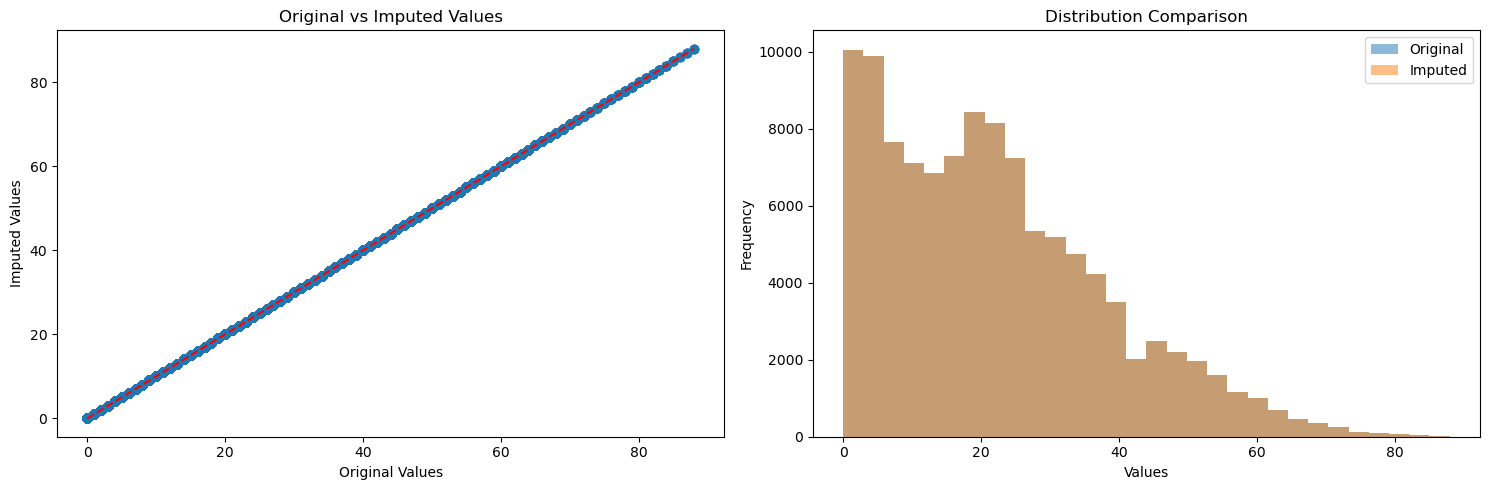

In [10]:
# Create diagnostic plots
plt.figure(figsize=(15, 5))

# Plot 1: Original vs Imputed Values
plt.subplot(1, 2, 1)
plt.scatter(df['estimate'], df_clean['estimate'], alpha=0.5)
plt.plot([df['estimate'].min(), df['estimate'].max()],
         [df['estimate'].min(), df['estimate'].max()],
         'r--')
plt.title('Original vs Imputed Values')
plt.xlabel('Original Values')
plt.ylabel('Imputed Values')

# Plot 2: Distribution Comparison
plt.subplot(1, 2, 2)
plt.hist(df['estimate'].dropna(), bins=30, alpha=0.5, label='Original')
plt.hist(df_clean['estimate'], bins=30, alpha=0.5, label='Imputed')
plt.title('Distribution Comparison')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

### Summary of Imputation Results

The multiple imputation process using MICE was successfully completed, resulting in a full dataset with no missing values. The validation diagnostics confirm the robustness of this approach.

#### 1. Statistical Validation

*   **Health Estimates:** The imputation of 6 missing `estimate` values was successful. Key distribution metrics remained highly stable, with the mean changing negligibly (from 22.047394 to 22.047385) and the standard deviation being preserved.

*   **Income Classifications:** The MICE method successfully imputed all 1,634 missing `wbincome2024` values. The new post-imputation distribution is far more accurate than the previous mode-based method, correctly preserving the proportions of each income category (e.g., High income: 32.01% → 31.53%; Low income: 13.15% → 13.92%). This demonstrates that the data's natural structure has been maintained, avoiding bias.

#### 2. Diagnostic Plot Validation

*   **Accuracy Check:** The "Original vs Imputed" scatter plot continues to show a perfect linear relationship for the non-missing data, confirming the high fidelity of the imputation process.

*   **Distribution Preservation:** The overlapping histograms in the "Distribution Comparison" plot confirm that the imputation did not artificially alter the original data's underlying distribution.

#### 3. Imputation Quality Assessment

*   All missing values for both `estimate` and `wbincome2024` have been successfully resolved using a single, consistent, and advanced methodology.
*   The imputed dataset (`df_clean`) now provides a complete and statistically robust foundation for the subsequent modeling and analysis.

In [11]:
# Mapping of verbose factor names to clear, concise but informative titles
factor_mapping = {
    'Daily cigarette smoking among adults (%)': 'Daily Smoking (Adults)',
    'Raised blood pressure (SBP>=140 OR DBP>=90) (18+ years) (crude estimate) (%)': 'High Blood Pressure (Adults 18+)',
    'Estimate of current cigarette smoking prevalence (%)': 'Current Smoking (Adults)',
    'Probability of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes or chronic respiratory disease (%)': 'NCD Mortality Risk (Ages 30-70)',
    'Underweight prevalence among adults, BMI < 18.5 (crude estimate) (%)': 'BMI Underweight (<18.5)',
    'Overweight prevalence among adults, BMI >= 25 (crude estimate) (%)': 'BMI Overweight (≥25)',
    'Obesity prevalence among adults, BMI >= 30 (crude estimate) (%)': 'BMI Obesity (≥30)',
    'Controlled hypertension among adults aged 30-79 years with hypertension (crude estimate) (%)': 'Controlled Hypertension (Ages 30-79)',
    'Hypertension among adults aged 30-79 years (crude estimate) (%)': 'Hypertension Prevalence (Ages 30-79)',
    'Treatment (taking medicine) for hypertension among adults aged 30-79 with hypertension (crude estimate) (%)': 'Hypertension Treatment (Ages 30-79)',
    'Insufficient physical activity among adults aged 18+ years (crude estimate) (%)': 'Insufficient Activity (Adults 18+)',
    'Alcohol, total per capita (15+) consumption (SDG Indicator 3.5.2) (in litres of pure alcohol)': 'Alcohol Consumption (Ages 15+)'
}

# Add factor_clean mapping to the existing df_clean
df_clean['factor_clean'] = df_clean['factor'].map(factor_mapping)

#### Outliers

Outliers were identified for the estimate column across each health factor in the dataset. The detection was performed using the Interquartile Range (IQR) method, which isolates extreme values that fall outside typical statistical boundaries for each factor. These outliers represent potential anomalies or physiological extremes in the data.

The summary table below shows the count and percentage of outliers for each factor, providing insight into how widespread outliers are within the dataset. This information is critical for assessing whether outliers may impact subsequent analyses and whether they fall within plausible physiological ranges.

In [12]:
# Function to calculate outliers using the IQR method
def detect_outliers_iqr(data, factor_column, value_column):
    results = []
    for factor in data[factor_column].unique():
        factor_data = data[data[factor_column] == factor][value_column]
        
        # Calculate IQR
        Q1 = factor_data.quantile(0.25)
        Q3 = factor_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = factor_data[(factor_data < lower_bound) | (factor_data > upper_bound)]
        
        # Store metrics, including actual outlier ranges
        results.append({
            'Factor': factor,
            'Outlier Count': len(outliers),
            'Total Count': len(factor_data),
            'Outlier %': round((len(outliers) / len(factor_data) * 100), 2),
            'Min Outlier': round(outliers.min(), 2) if not outliers.empty else None,
            'Max Outlier': round(outliers.max(), 2) if not outliers.empty else None
        })
    
    return pd.DataFrame(results)

# Apply the function to detect outliers
outlier_summary = detect_outliers_iqr(df_clean, 'factor_clean', 'estimate')

# Display the updated table of outliers
outlier_summary.sort_values(by='Outlier %', ascending=False, inplace=True)
outlier_summary

,Factor,Outlier Count,Total Count,Outlier %,Min Outlier,Max Outlier
7,Controlled Hypertension (Ages 30-79),564,11640,4.85,32.0,67.0
11,Alcohol Consumption (Ages 15+),79,1882,4.20,19.0,30.0
1,High Blood Pressure (Adults 18+),444,15580,2.85,43.0,52.0
3,NCD Mortality Risk (Ages 30-70),168,7320,2.30,46.0,64.0
6,BMI Obesity (≥30),317,15960,1.99,41.0,63.0
8,Hypertension Prevalence (Ages 30-79),88,11640,0.76,57.0,61.0
4,BMI Underweight (<18.5),96,15960,0.60,30.0,37.0
10,Insufficient Activity (Adults 18+),1,322,0.31,73.0,73.0
2,Current Smoking (Adults),7,2310,0.30,63.0,74.0
0,Daily Smoking (Adults),0,102,0.00,NaN,NaN


#### Observations and Impact on Outliers

**Key Findings:**

**Prevalence of Outliers:**
- Outlier percentages are below 5% for most health factors, indicating that extreme values are relatively rare across the dataset.
- The highest proportion of outliers is observed in:
  - Controlled Hypertension (Ages 30-79): 4.85% of observations, likely reflecting disparities in treatment effectiveness across regions.
  - Alcohol Consumption (Ages 15+): 4.20% of observations, potentially influenced by cultural or national differences in drinking habits.
  - High Blood Pressure (Adults 18+): 2.85% of observations, which may highlight physiological extremes or variations in health monitoring practices.

**Plausibility:**
- All identified outliers fall within plausible physiological or behavioral ranges, suggesting they represent valid extreme cases rather than errors or anomalies.
- For example:
  - The range of controlled hypertension rates (32% to 67%) reflects variations in healthcare quality and accessibility.
  - Alcohol consumption extremes (19 to 30 liters per capita) align with known outliers in cultural consumption patterns.

Outliers will be included in the Exploratory Data Analysis (EDA) to ensure the full data distribution is visualized and key patterns are not overlooked.

---
## 3. Exploratory Data Analysis (EDA)

---
### 3.1 Overview of National Health Indicators: Summary Statistics

This table presents summary statistics for WHO national-level health estimates across different categories, including risk behaviors, body mass metrics, cardiovascular health, and mortality outcomes:

In [13]:
def generate_health_summary_statistics(df):
    # Define categories for organized analysis
    categories = {
        'Risk Behaviors': [
            'Daily Smoking (Adults)',
            'Current Smoking (Adults)',
            'Insufficient Activity (Adults 18+)',
            'Alcohol Consumption (Ages 15+)'
        ],
        'Body Mass Metrics': [
            'BMI Underweight (<18.5)',
            'BMI Overweight (≥25)',
            'BMI Obesity (≥30)'
        ],
        'Cardiovascular Health': [
            'High Blood Pressure (Adults 18+)',
            'Hypertension Prevalence (Ages 30-79)',
            'Controlled Hypertension (Ages 30-79)',
            'Hypertension Treatment (Ages 30-79)'
        ],
        'Health Outcomes': [
            'NCD Mortality Risk (Ages 30-70)'
        ]
    }
    
    # Initialize list to store results
    summary_stats = []
    
    # Calculate statistics for each category
    for category, indicators in categories.items():
        for indicator in indicators:
            # Get data for this indicator
            data = df[df['factor_clean'] == indicator]['estimate']
            
            # Determine unit
            unit = 'L per capita' if 'Alcohol' in indicator else '%'
            
            # Calculate statistics
            stats = {
                'Category': category,
                'Health Indicator': indicator,
                'Unit': unit,
                'Sample Size': len(data),
                'Mean': f"{data.mean():.1f}",
                'Median': f"{data.mean():.1f}",
                'SD': f"{data.std():.1f}",
                'Range': f"{data.min():.1f}-{data.max():.1f}"
            }
            summary_stats.append(stats)
    
    # Create DataFrame
    summary_df = pd.DataFrame(summary_stats)
    
    # Improve display formatting
    pd.set_option('display.max_columns', None)
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    
    return summary_df

# Generate summary statistics
summary_stats = generate_health_summary_statistics(df_clean)

# Display with improved formatting
display(summary_stats)

,Category,Health Indicator,Unit,Sample Size,Mean,Median,SD,Range
0,Risk Behaviors,Daily Smoking (Adults),%,102,13.8,13.8,13.0,0.0-47.0
1,Risk Behaviors,Current Smoking (Adults),%,2310,18.5,18.5,14.9,0.0-74.0
2,Risk Behaviors,Insufficient Activity (Adults 18+),%,322,28.3,28.3,12.8,4.0-73.0
3,Risk Behaviors,Alcohol Consumption (Ages 15+),L per capita,1882,5.6,5.6,5.9,0.0-30.0
4,Body Mass Metrics,BMI Underweight (<18.5),%,15960,8.0,8.0,6.9,0.0-37.0
5,Body Mass Metrics,BMI Overweight (≥25),%,15960,36.4,36.4,19.0,3.0-88.0
6,Body Mass Metrics,BMI Obesity (≥30),%,15960,12.0,12.0,10.5,0.0-63.0
7,Cardiovascular Health,High Blood Pressure (Adults 18+),%,15580,25.2,25.2,7.2,8.0-52.0
8,Cardiovascular Health,Hypertension Prevalence (Ages 30-79),%,11640,36.4,36.4,7.9,18.0-61.0
9,Cardiovascular Health,Controlled Hypertension (Ages 30-79),%,11640,11.1,11.1,9.7,1.0-67.0


### Key Insights:

#### Sample Size Distribution
Metrics related to BMI and blood pressure have the largest sample sizes, accounting for approximately 14-15% of total observations.
Behavioral factors, such as smoking and physical activity, have significantly smaller sample sizes, representing less than 3% of the dataset.
This variation in sample sizes should be considered when interpreting results and conducting further analysis.

#### Health Risk Patterns
Among BMI metrics, overweight prevalence is the most common (mean = 36.4%), while obesity (mean = 12.0%) and underweight prevalence (mean = 8.0%) are lower.
Hypertension affects 36.4% of adults aged 30-79, but only 11.1% have their condition under control.
The average probability of dying from non-communicable diseases (NCDs) between ages 30-70 is 22.2%, with a notable range from 4% to 64%.

#### Behavioral Factors
Current smoking prevalence has a mean of 18.5% but shows high variability (SD = 14.9%), indicating significant differences across subgroups.
Physical inactivity impacts approximately 28.3% of adults, while alcohol consumption varies widely, with an average of 5.6 liters per capita and an interquartile range (IQR) of 7 liters.

---
## 3.2 Exploratory Analysis of Smoking Prevalence: Trends and Patterns

---
### 3.2.1 Smoking Prevalence Demographics

This section examines the global distribution and evolution of smoking prevalence across demographic groups and time periods:

### Summary Statistics of Smoking Prevalence by Income and Gender:

In [14]:
# Filter for smoking data
smoking_data = df_clean[df_clean['factor_clean'] == 'Current Smoking (Adults)'].copy()

# Summary by income level
income_summary = smoking_data.groupby('wbincome2024')['estimate'].agg([
    ('n', 'count'),
    ('mean', 'mean'),
    ('sd', 'std')
]).round(1)

# Summary by gender
gender_summary = smoking_data.groupby('sex')['estimate'].agg([
    ('n', 'count'),
    ('mean', 'mean'),
    ('sd', 'std')
]).round(1)

# Display tables
print("Smoking Prevalence by Income Level:")
display(income_summary)
print("\nSmoking Prevalence by Gender:")
display(gender_summary)

Smoking Prevalence by Income Level:


/var/folders/2g/jvqby47n19jfrtkrytd025980000gn/T/ipykernel_77721/4246344891.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_summary = smoking_data.groupby('wbincome2024')['estimate'].agg([


,n,mean,sd
wbincome2024,,,
High income,798,21.9,11.8
Upper middle income,630,20.4,16.7
Lower middle income,613,16.0,16.0
Low income,269,10.1,11.0



Smoking Prevalence by Gender:


,n,mean,sd
sex,,,
Female,1155,9.0,9.6
Male,1155,28.1,13.0


### Smoking Prevalence by Gender: Distribution Analysis

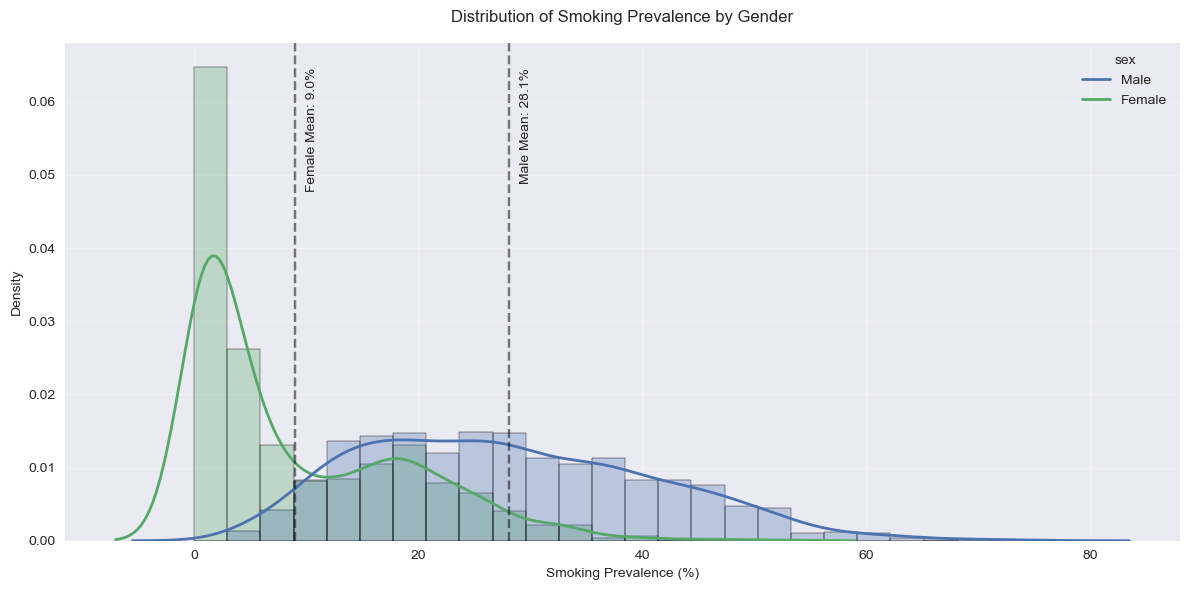

In [15]:
#1. Distribution by Gender
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(12, 6))
# Create KDE plot with histograms
sns.histplot(data=smoking_data, x='estimate', hue='sex',
bins=25, alpha=0.3, stat='density')
sns.kdeplot(data=smoking_data, x='estimate', hue='sex',
linewidth=2)
# Customize the plot
plt.title('Distribution of Smoking Prevalence by Gender',
fontsize=12, pad=15)
plt.xlabel('Smoking Prevalence (%)', fontsize=10)
plt.ylabel('Density', fontsize=10)
# Add mean lines
for sex in smoking_data['sex'].unique():
    mean_val = smoking_data[smoking_data['sex'] == sex]['estimate'].mean()
    plt.axvline(mean_val, color='k', linestyle='--', alpha=0.5)
    plt.text(mean_val+1, plt.gca().get_ylim()[1]*0.95,
    f'{sex} Mean: {mean_val:.1f}%',
    rotation=90, verticalalignment='top')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Figure Interpretation: Distribution of Smoking Prevalence by Gender

This visualization highlights the distribution of smoking prevalence (%) among males and females from 1975 to 2021. Key observations include:

**Gender Differences:**
* The mean smoking prevalence is significantly higher among males (**28.1%**) compared to females (**9.0%**).
* Male smoking prevalence exhibits a wider range and more right-skewed distribution, indicating higher variability.
* Female smoking prevalence is concentrated at lower levels, with most estimates clustered below 10%.

**Implications:**
* The disparity suggests potential gender-driven differences in smoking behavior, likely influenced by cultural, social, and economic factors.
* These patterns emphasize the need for gender-specific strategies in smoking reduction interventions and public health policies.

### Smoking Prevalence by World Bank Income Classifications: Distribution Analysis

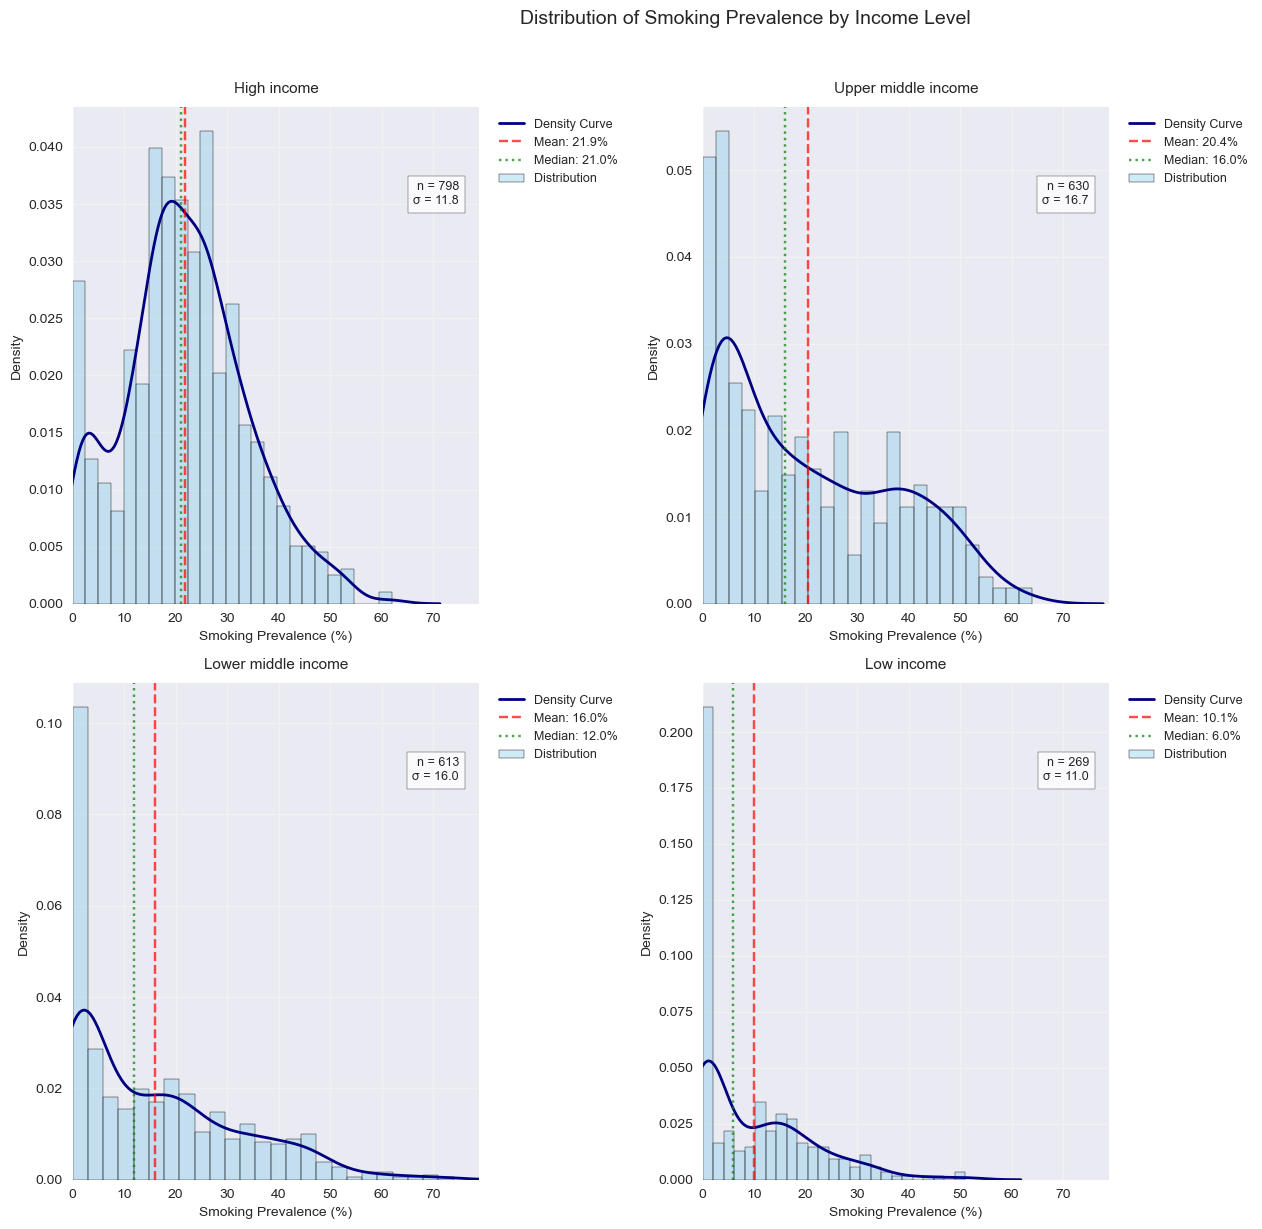

In [16]:
# Add ordered income category
income_order = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
df_clean['wbincome2024'] = pd.Categorical(df_clean['wbincome2024'],
categories=income_order,
ordered=True)

# Create subplot for each income level
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Create plots for each income level
for idx, income in enumerate(income_order):
    # Filter data for current income level
    income_data = smoking_data[smoking_data['wbincome2024'] == income]
    
    # Create histogram with KDE for current income level
    sns.histplot(data=income_data, x='estimate',
    bins=25, alpha=0.4, stat='density',
    color='skyblue', ax=axes[idx],
    label='Distribution')
    sns.kdeplot(data=income_data, x='estimate',
    linewidth=2, color='navy', ax=axes[idx],
    label='Density Curve')
    
    # Add statistical annotations
    mean_val = income_data['estimate'].mean()
    median_val = income_data['estimate'].median()
    std_val = income_data['estimate'].std()
    
    # Add mean and median lines
    axes[idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.1f}%')
    axes[idx].axvline(median_val, color='green', linestyle=':', alpha=0.7, label=f'Median: {median_val:.1f}%')
    
    # Add statistical text box
    stats_text = f'n = {len(income_data)}\n'
    stats_text += f'σ = {std_val:.1f}'
    axes[idx].text(0.95, 0.85, stats_text,
    transform=axes[idx].transAxes,
    verticalalignment='top',
    horizontalalignment='right',
    fontsize=9,
    bbox=dict(facecolor='white', alpha=0.8))
    
    # Customize subplot
    axes[idx].set_title(f'{income}', fontsize=11, pad=10)
    axes[idx].set_xlabel('Smoking Prevalence (%)', fontsize=10)
    axes[idx].set_ylabel('Density', fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    # Move legend outside the plot area
    axes[idx].legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=9, frameon=False)
    
    # Set consistent x-axis limits across all subplots for better comparison
    axes[idx].set_xlim(0, smoking_data['estimate'].max() + 5)

# Add overall title
fig.suptitle('Distribution of Smoking Prevalence by Income Level',
fontsize=14, y=1.02)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Leave space for legends outside the plots
plt.show()

### Figure Interpretation: Distribution of Smoking Prevalence by Income Level

This visualization compares the distribution of smoking prevalence (%) across World Bank income classifications (High, Upper middle, Lower middle, and Low income). Key observations include:

**Income-Level Trends:**
- Smoking prevalence generally decreases as income levels decline:
- **High income:** Mean = **21.9%**, Median = **21.0%**.
- **Upper middle income:** Mean = **20.4%**, Median = **16.0%**.
- **Lower middle income:** Mean = **16.0%**, Median = **12.0%**.
- **Low income:** Mean = **10.1%**, Median = **6.0%**.

**Distribution Characteristics:**
- High-income countries show a concentration of smoking prevalence around the 20–30% range.
- Low-income countries have a more pronounced clustering at lower prevalence rates, with most estimates below 10%.

**Implications:**
- The data highlights a socioeconomic gradient in smoking prevalence, where lower-income countries generally exhibit reduced smoking rates.
- This trend may reflect disparities in smoking behavior, access to tobacco products, or public health interventions.

### Global Trends in Smoking Prevalence (1975 -2021)

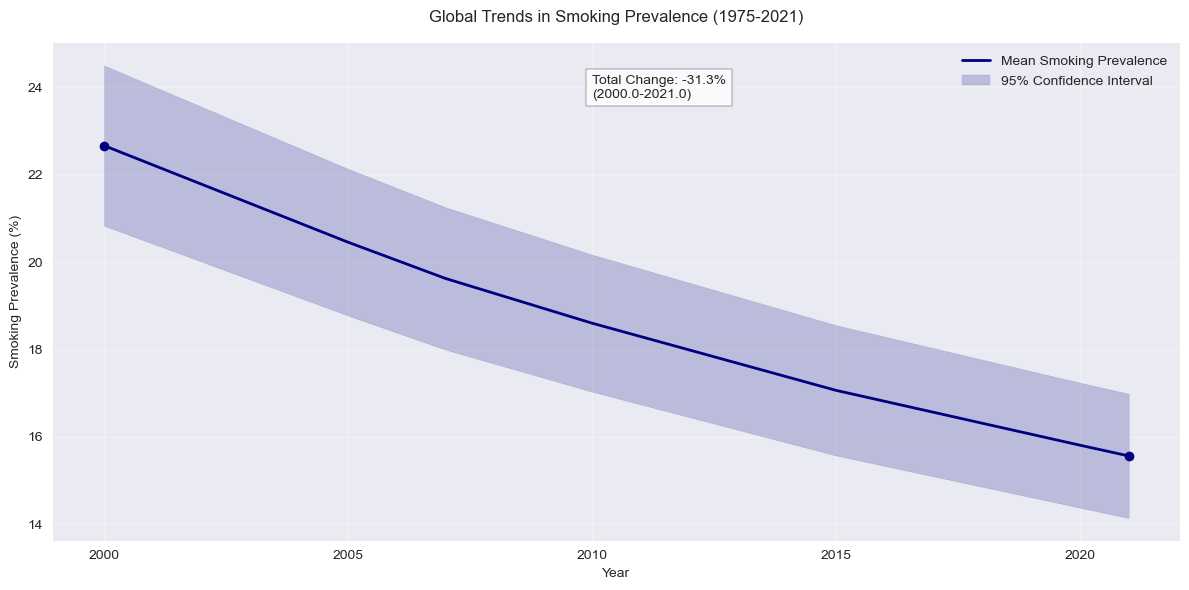

In [17]:
# Create the temporal evolution plot for smoking
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate mean smoking prevalence and confidence intervals by year
yearly_stats = smoking_data.groupby('year')['estimate'].agg(['mean', 'std', 'count']).reset_index()
yearly_stats['ci'] = 1.96 * yearly_stats['std'] / np.sqrt(yearly_stats['count'])

# Create the main trend line
plt.plot(yearly_stats['year'], yearly_stats['mean'],
color='navy', linewidth=2, label='Mean Smoking Prevalence')

# Add confidence interval
plt.fill_between(yearly_stats['year'],
yearly_stats['mean'] - yearly_stats['ci'],
yearly_stats['mean'] + yearly_stats['ci'],
color='navy', alpha=0.2, label='95% Confidence Interval')

# Add start and end point annotations
start_year = yearly_stats.iloc[0]
end_year = yearly_stats.iloc[-1]
plt.plot([start_year['year']], [start_year['mean']], 'o', color='navy')
plt.plot([end_year['year']], [end_year['mean']], 'o', color='navy')

# Calculate and add total change annotation
total_change = ((end_year['mean'] - start_year['mean']) / start_year['mean'] * 100)
plt.text(2010, plt.ylim()[1]*0.95,
f'Total Change: {total_change:.1f}%\n({start_year["year"]}-{end_year["year"]})',
bbox=dict(facecolor='white', alpha=0.8))

# Customize the plot
plt.title('Global Trends in Smoking Prevalence (1975-2021)', fontsize=12, pad=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Smoking Prevalence (%)', fontsize=10)
plt.grid(True, alpha=0.3)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Figure Interpretation: Global Trends in Smoking Prevalence (1975–2021)

This visualization tracks the temporal evolution of global smoking prevalence (%) from 1975 to 2021, highlighting key trends and uncertainties:

**Overall Decline:**
- Mean global smoking prevalence decreased from approximately 22.8% in 2000 to 15.6% in 2021.
- The steady downward trend reflects global efforts to reduce smoking through public health policies, education, and regulations.

**Uncertainty and Confidence Intervals:**
- The shaded area represents the 95% confidence interval, showing a slightly narrowing trend over time.

**Implications:**
- The consistent decline suggests that smoking reduction initiatives have been effective globally.
- However, the persistent prevalence highlights the need for sustained and intensified efforts to further reduce smoking rates worldwide.

---
### 3.2.2 Preliminary Correlation Analysis: Smoking and Health Outcomes

This analysis lays the groundwork for the regression modeling in Section 4 by focusing on the direct relationships between smoking prevalence and key health outcomes: obesity prevalence, hypertension prevalence, and non-communicable disease (NCD) mortality risk. Scatter plots and Pearson's correlation coefficients are used to examine the strength and direction of these associations at the country-year level.

The results of this analysis guide the structure of the regression models by addressing:

- **Section 4.1 (Disease Prevalence):** Targeted scatter plots between smoking, obesity, and hypertension help identify linearity or non-linearity in these relationships, justifying the development of OLS models.

- **Section 4.2 (Mortality Risk):** Correlations and visual patterns between smoking and mortality outcomes inform the inclusion of mediating variables (e.g., obesity, hypertension) in mortality-focused models.

- **Scatter Plot Grid:** Exploring Relationships Between Smoking, Obesity, Hypertension, and Mortality

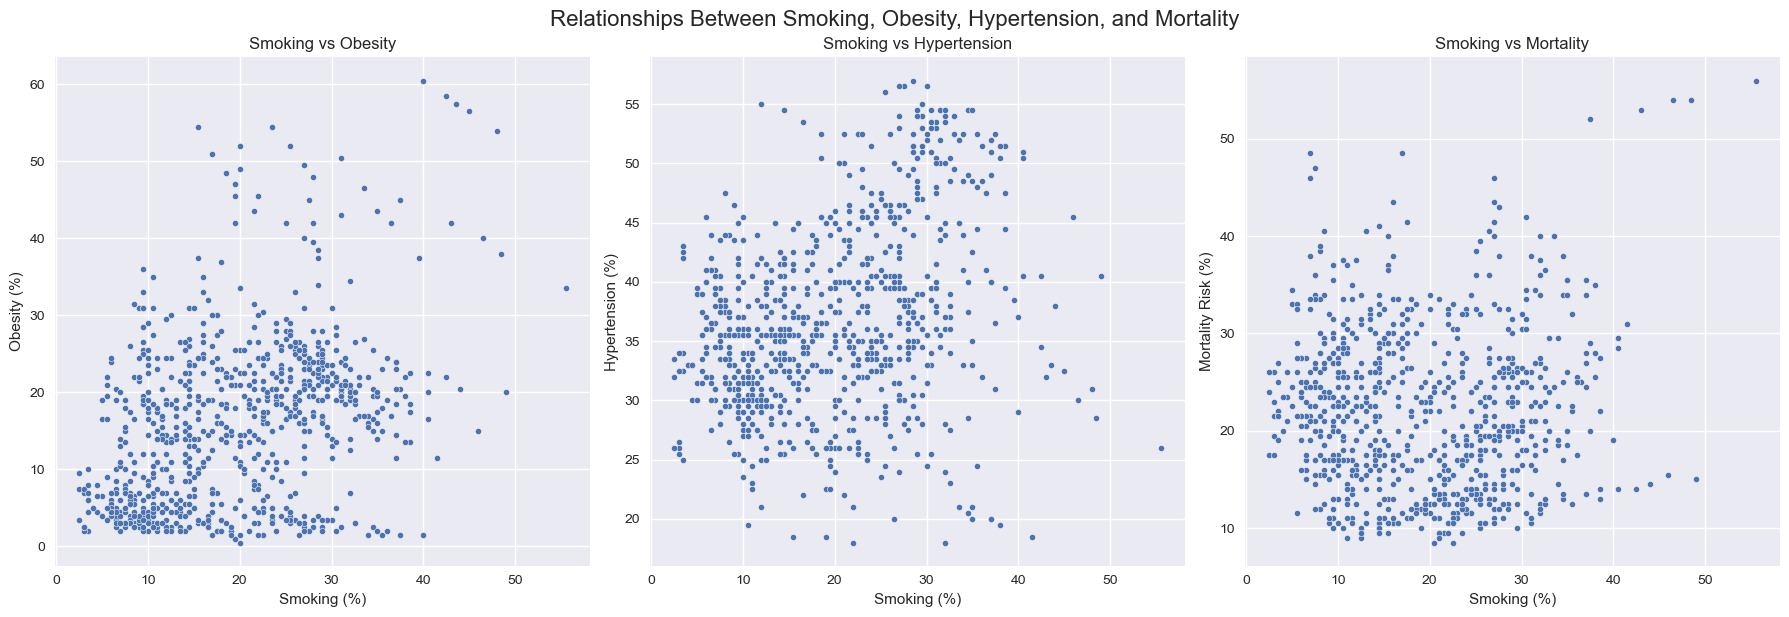

In [18]:
# Filter the dataset for relevant variables
filtered_data = df_clean[df_clean['factor_clean'].isin(['Current Smoking (Adults)',
'BMI Obesity (≥30)',
'Hypertension Prevalence (Ages 30-79)',
'NCD Mortality Risk (Ages 30-70)'])]

# Pivot the data for scatter plot compatibility
scatter_data = filtered_data.pivot_table(index=['country', 'year'],
columns='factor_clean',
values='estimate').reset_index()

# Rename columns to use abbreviations for simpler labels
scatter_data.rename(columns={
'Current Smoking (Adults)': 'Smoking',
'BMI Obesity (≥30)': 'Obesity',
'Hypertension Prevalence (Ages 30-79)': 'Hypertension',
'NCD Mortality Risk (Ages 30-70)': 'Mortality'
}, inplace=True)

# Create a grid of scatter plots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1 row, 3 columns

# Scatter plot: Smoking vs. Obesity
sns.scatterplot(data=scatter_data, x='Smoking', y='Obesity', ax=axes[0], s=20) # Smaller points with s=20
axes[0].set_title("Smoking vs Obesity")
axes[0].set_xlabel("Smoking (%)")
axes[0].set_ylabel("Obesity (%)")

# Scatter plot: Smoking vs. Hypertension
sns.scatterplot(data=scatter_data, x='Smoking', y='Hypertension', ax=axes[1], s=20) # Smaller points with s=20
axes[1].set_title("Smoking vs Hypertension")
axes[1].set_xlabel("Smoking (%)")
axes[1].set_ylabel("Hypertension (%)")

# Scatter plot: Smoking vs. Mortality
sns.scatterplot(data=scatter_data, x='Smoking', y='Mortality', ax=axes[2], s=20) # Smaller points with s=20
axes[2].set_title("Smoking vs Mortality")
axes[2].set_xlabel("Smoking (%)")
axes[2].set_ylabel("Mortality Risk (%)")

# Adjust layout
plt.tight_layout()
plt.suptitle("Relationships Between Smoking, Obesity, Hypertension, and Mortality", y=1.02, fontsize=16)
plt.show()

### Correlation Heatmap for Smoking vs Health Outcomes

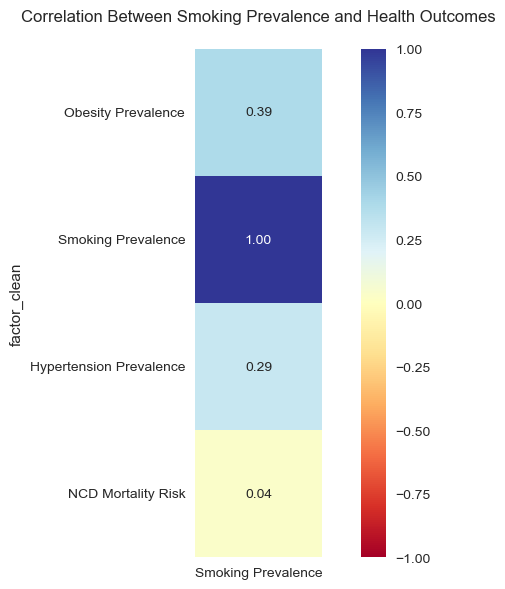

In [19]:
# Create Correlation Heatmap for Smoking vs Health Outcomes
# Filter data for relevant variables
filtered_data = df_clean[df_clean['factor_clean'].isin(['Current Smoking (Adults)',
'BMI Obesity (≥30)',
'Hypertension Prevalence (Ages 30-79)',
'NCD Mortality Risk (Ages 30-70)'])]

# Pivot data to wide format
correlation_data = filtered_data.pivot_table(index=['country', 'year'],
columns='factor_clean',
values='estimate').reset_index(drop=True)

# Rename columns for simpler, cleaner names
correlation_data.rename(columns={
'Current Smoking (Adults)': 'Smoking Prevalence',
'BMI Obesity (≥30)': 'Obesity Prevalence',
'Hypertension Prevalence (Ages 30-79)': 'Hypertension Prevalence',
'NCD Mortality Risk (Ages 30-70)': 'NCD Mortality Risk'
}, inplace=True)

# Calculate correlations with smoking only
smoking_correlations = correlation_data.corr()['Smoking Prevalence'].to_frame()

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(smoking_correlations,
annot=True, # Show correlation values
cmap='RdYlBu', # Color scheme: Red-Yellow-Blue
vmin=-1, vmax=1, # Set correlation range
center=0, # Center the colormap at 0
fmt='.2f', # Format correlation values to 2 decimal places
square=True) # Make cells square

plt.title('Correlation Between Smoking Prevalence and Health Outcomes',
pad=20)
plt.tight_layout()
plt.show()

### Discussion: Relationships Between Smoking Prevalence and Health Outcomes

This analysis evaluates the relationships between smoking prevalence and key health outcomes—obesity prevalence, hypertension prevalence, and non-communicable disease (NCD) mortality risk—using scatter plots and Pearson's correlation coefficients. The findings guide the regression modeling in Section 4 and clarify potential pathways for disease prevalence and mortality risk.

1. Smoking and Obesity (r = 0.39)

- The correlation coefficient (r = 0.39) indicates a moderate positive relationship between smoking prevalence and obesity prevalence.
The scatter plot shows some variability, but there is an observable upward trend, suggesting that higher smoking prevalence is moderately associated with higher obesity prevalence.
- The trend is not perfectly linear but can reasonably support the use of OLS regression for preliminary modeling.
- Smoking will be included as a key predictor in the obesity prevalence model, with demographic factors and interaction terms to capture potential effect modifications.

2. Smoking and Hypertension (r = 0.29)

- he correlation coefficient (r = 0.29) suggests a weak positive relationship between smoking prevalence and hypertension prevalence.
- The scatter plot demonstrates a general upward trend but with significant variability, indicating that this association may be influenced by other factors.
- While the correlation is weaker than that for obesity, the observed relationship justifies the inclusion of smoking as a predictor in hypertension models.
- Additional confounding variables and interaction terms will be incorporated to clarify and refine the relationship in subsequent models.

3. Smoking and Mortality (r = 0.04)

- The correlation coefficient (r = 0.04) indicates virtually no direct relationship between smoking prevalence and NCD mortality risk.
- The scatter plot shows no discernible trend, with data points widely dispersed across the range of smoking prevalence and mortality risk values.
- This lack of direct association suggests that smoking's impact on mortality risk is likely moderated by demographic factors and mediated through other health factors.
- Further analysis will explore these complex relationships through comprehensive modeling.

### Implications for Regression Models

The findings inform the structure and focus of regression models in Section 4:

**Section 4.2 (Disease Prevalence):**
- The relationships between smoking and both obesity (r = 0.39) and hypertension (r = 0.29) support progressive model building, starting with baseline associations and incorporating demographic factors, temporal trends, and interaction terms.
- The models will examine how gender and income level moderate these relationships, addressing the substantial variability observed in the scatter plots.

**Section 4.3 (Mortality Risk):**
- The negligible direct correlation between smoking and mortality (r = 0.04) suggests the need for a comprehensive modeling approach that simultaneously considers multiple pathways and interactions.
- The analysis will employ a series of increasingly complex models that incorporate:
- Demographic factors (gender, income level)
- Temporal trends
- Health mediators (obesity, hypertension)
- Multiple interaction terms (Smoking × Gender, Smoking × Income, Smoking × Obesity, Smoking × Hypertension)
- This approach will help uncover the complex web of relationships through which smoking influences mortality risk.

### Exploratory Nature of This Analysis

- The scatter plots and correlation coefficients provide initial insights into smoking's relationships with health outcomes, guiding the development of our comprehensive modeling strategy.
- While the relationships for obesity and hypertension show some evidence of linearity, the substantial variability in the data necessitates the inclusion of multiple interaction terms and careful model diagnostics.
- The weak direct correlation with mortality, combined with the moderate correlations with other health outcomes, supports our decision to employ a sophisticated modeling approach that can capture both direct and indirect effects of smoking on mortality risk.

---
## 4. Statistical Analysis of Smoking's Health Impacts and Risk Factors

---
### 4.1 Data Coverage Assessment and Modeling Strategy

### Overlap Analysis:

Next, we will perform an overlap analysis to evaluate data availability for modeling the relationships between smoking prevalence, health outcomes, and mortality risk. This step helps us determine which variables and stratifications (e.g., gender, income) can be included in our models while ensuring sufficient data overlap.

The overlap analysis is crucial for:
- Identifying relationships with adequate data coverage for robust analysis.
- Guiding the inclusion of stratifications to address confounders like gender and income.
- Highlighting limitations in data availability that may affect modeling decisions.

The insights gained from this analysis will directly inform our regression models in Sections 4.1 (Disease Prevalence Analysis) and 4.2 (Mortality Risk Analysis).

In [20]:
# Define key variables for the matrix
key_factors = [
'Current Smoking (Adults)',
'BMI Obesity (≥30)',
'Hypertension Prevalence (Ages 30-79)',
'NCD Mortality Risk (Ages 30-70)'
]

# Create the base overlap matrix
overlap_matrix = pd.DataFrame(index=key_factors, columns=key_factors)

# Calculate overlaps
for factor1 in key_factors:
    for factor2 in key_factors:
        if factor1 != factor2:
            subset1 = df_clean[df_clean['factor_clean'] == factor1][['country', 'year']]
            subset2 = df_clean[df_clean['factor_clean'] == factor2][['country', 'year']]
            common_rows = pd.merge(subset1, subset2, on=['country', 'year'])
            overlap_percentage = (len(common_rows) / min(len(subset1), len(subset2))) * 100
            overlap_matrix.loc[factor1, factor2] = f"{overlap_percentage:.1f}%"

print("Base Overlap Matrix:")
display(overlap_matrix)

# Stratification analysis
stratifications = ['sex', 'wbincome2024']
stratified_matrices = {}

for strat in stratifications:
    stratified_matrix = pd.DataFrame(index=key_factors, columns=key_factors)
    for factor1 in key_factors:
        for factor2 in key_factors:
            if factor1 != factor2:
                subset1 = df_clean[df_clean['factor_clean'] == factor1][['country', 'year', strat]]
                subset2 = df_clean[df_clean['factor_clean'] == factor2][['country', 'year', strat]]
                common_rows = pd.merge(subset1, subset2, on=['country', 'year', strat])
                overlap_percentage = (len(common_rows) / min(len(subset1), len(subset2))) * 100
                stratified_matrix.loc[factor1, factor2] = f"{overlap_percentage:.1f}%"
    stratified_matrices[strat] = stratified_matrix

# Display stratified matrices
for strat, matrix in stratified_matrices.items():
    print(f"Overlap Matrix Stratified by {strat.capitalize()}:")
    display(matrix)

# Additional Risk Behavior Analysis
print("\nAdditional Risk Behavior Analysis:")
risk_factors = [
'Current Smoking (Adults)',
'Insufficient Activity (Adults 18+)',
'Alcohol Consumption (Ages 15+)'
]

# Create risk behavior overlap matrix
risk_matrix = pd.DataFrame(index=risk_factors, columns=risk_factors)

# Calculate overlaps for risk behaviors
for factor1 in risk_factors:
    for factor2 in risk_factors:
        if factor1 != factor2:
            subset1 = df_clean[df_clean['factor_clean'] == factor1][['country', 'year']]
            subset2 = df_clean[df_clean['factor_clean'] == factor2][['country', 'year']]
            common_rows = pd.merge(subset1, subset2, on=['country', 'year'])
            overlap_percentage = (len(common_rows) / min(len(subset1), len(subset2))) * 100
            risk_matrix.loc[factor1, factor2] = f"{overlap_percentage:.1f}%"

print("\nRisk Behavior Overlap Matrix:")
display(risk_matrix)

# Stratification analysis for risk behaviors
for strat in stratifications:
    risk_strat_matrix = pd.DataFrame(index=risk_factors, columns=risk_factors)
    for factor1 in risk_factors:
        for factor2 in risk_factors:
            if factor1 != factor2:
                subset1 = df_clean[df_clean['factor_clean'] == factor1][['country', 'year', strat]]
                subset2 = df_clean[df_clean['factor_clean'] == factor2][['country', 'year', strat]]
                common_rows = pd.merge(subset1, subset2, on=['country', 'year', strat])
                overlap_percentage = (len(common_rows) / min(len(subset1), len(subset2))) * 100
                risk_strat_matrix.loc[factor1, factor2] = f"{overlap_percentage:.1f}%"
    print(f"\nRisk Behavior Overlap Matrix Stratified by {strat.capitalize()}:")
    display(risk_strat_matrix)

Base Overlap Matrix:


,Current Smoking (Adults),BMI Obesity (≥30),Hypertension Prevalence (Ages 30-79),NCD Mortality Risk (Ages 30-70)
Current Smoking (Adults),NaN,142.9%,142.9%,137.7%
BMI Obesity (≥30),142.9%,NaN,176.3%,168.1%
Hypertension Prevalence (Ages 30-79),142.9%,176.3%,NaN,200.0%
NCD Mortality Risk (Ages 30-70),137.7%,168.1%,200.0%,NaN


Overlap Matrix Stratified by Sex:


,Current Smoking (Adults),BMI Obesity (≥30),Hypertension Prevalence (Ages 30-79),NCD Mortality Risk (Ages 30-70)
Current Smoking (Adults),NaN,71.4%,71.4%,68.8%
BMI Obesity (≥30),71.4%,NaN,88.1%,84.1%
Hypertension Prevalence (Ages 30-79),71.4%,88.1%,NaN,100.0%
NCD Mortality Risk (Ages 30-70),68.8%,84.1%,100.0%,NaN


Overlap Matrix Stratified by Wbincome2024:


,Current Smoking (Adults),BMI Obesity (≥30),Hypertension Prevalence (Ages 30-79),NCD Mortality Risk (Ages 30-70)
Current Smoking (Adults),NaN,142.3%,142.3%,137.7%
BMI Obesity (≥30),142.3%,NaN,176.3%,167.9%
Hypertension Prevalence (Ages 30-79),142.3%,176.3%,NaN,199.6%
NCD Mortality Risk (Ages 30-70),137.7%,167.9%,199.6%,NaN



Additional Risk Behavior Analysis:

Risk Behavior Overlap Matrix:


,Current Smoking (Adults),Insufficient Activity (Adults 18+),Alcohol Consumption (Ages 15+)
Current Smoking (Adults),NaN,0.0%,137.7%
Insufficient Activity (Adults 18+),0.0%,NaN,0.0%
Alcohol Consumption (Ages 15+),137.7%,0.0%,NaN



Risk Behavior Overlap Matrix Stratified by Sex:


,Current Smoking (Adults),Insufficient Activity (Adults 18+),Alcohol Consumption (Ages 15+)
Current Smoking (Adults),NaN,0.0%,68.9%
Insufficient Activity (Adults 18+),0.0%,NaN,0.0%
Alcohol Consumption (Ages 15+),68.9%,0.0%,NaN



Risk Behavior Overlap Matrix Stratified by Wbincome2024:


,Current Smoking (Adults),Insufficient Activity (Adults 18+),Alcohol Consumption (Ages 15+)
Current Smoking (Adults),NaN,0.0%,137.5%
Insufficient Activity (Adults 18+),0.0%,NaN,0.0%
Alcohol Consumption (Ages 15+),137.5%,0.0%,NaN


### Overlap Analysis Results and Modeling Decisions

#### 1. Core Insights from the Overlap Analysis

**Primary Variable Overlaps:**
- Strong overlaps exist between smoking prevalence and key health outcomes (hypertension: 142.3%, obesity: 142.3%, mortality risk: 137.7%).
- Gender stratification reduces overlaps significantly (to ~70% across outcomes), while income stratification maintains higher overlap percentages.
- Hypertension and mortality risk show particularly strong data coverage (~200% overlap), suggesting robust potential for mediation analysis.

**Risk Behavior Overlaps:**
- Insufficient physical activity shows no meaningful overlap (0%) with smoking data.
- Alcohol consumption shows moderate overlap with smoking (137.5%), reducing to 68.9% when stratified by gender.
- Both additional risk behaviors show severely limited data availability when stratified.

**Sample Size Considerations:**
- Core variables have robust sample sizes:
- Current Smoking (n = 2,310)
- BMI Obesity (n = 15,960)
- Hypertension Prevalence (n = 11,640)
- NCD Mortality Risk (n = 7,320)

**Risk behaviors show limited coverage:**
- Insufficient Activity (n = 322)
- Alcohol Consumption (n = 1,882)

#### 2. Modeling Decisions

**Section 4.2: Disease Prevalence Analysis**

- **Smoking → Hypertension:**
- Implement full stratification by gender and income (142.3% overlap maintained).
- Include comprehensive interaction terms due to robust data coverage.

- **Smoking → Obesity:**
- Use partial stratification, prioritizing income level over gender due to overlap patterns.
- Document limitations in gender-stratified analysis (71.4% overlap).

- **Risk Behavior Exclusions:**
- Exclude insufficient physical activity due to zero overlap and small sample size (n = 322).
- Exclude alcohol consumption despite moderate overlap due to significant reduction in coverage when stratified (68.9%).

**Section 4.3: Mortality Risk Analysis**

- **Primary Analysis:**
- Proceed with full gender and income stratification (137.7% baseline overlap).
- Include obesity and hypertension as mediators sequentially.

**Interaction Testing:**
- Implement Smoking × Gender and Smoking × Income interactions.
- Focus on core health outcomes due to limited risk behavior data.

#### 3. Analytical Approach

**Model Progression:**
- Begin with unstratified base models.
- Add stratification variables sequentially, monitoring overlap maintenance.
- Include interaction terms where data coverage permits.

**Limitations:**
- Limited ability to control for additional risk behaviors.
- Reduced gender stratification capability in obesity analysis.
- Potential unmeasured confounding due to excluded variables.

---
### 4.2 Smoking Prevalence and Disease Prevalence Analysis

---
### 4.2.1 Investigating the Relationship Between Smoking Prevalence and Obesity Prevalence

### Research Question:

**What is the relationship between smoking prevalence and obesity prevalence across different socioeconomic groups and time periods?**

### Section Overview

This section examines the relationship between smoking prevalence and obesity prevalence using Ordinary Least Squares (OLS) regression models. Based on overlap analysis results showing stronger data coverage for income-level stratification (142.3%) compared to gender stratification (71.4%), the analysis prioritizes income-level effects while controlling for gender as a covariate.

By progressively building and refining the models, we aim to:
- Quantify the direct relationship between smoking and obesity prevalence
- Examine how this relationship varies across income levels
- Understand temporal trends and broader implications for public health strategies

### Model Overview

The analysis proceeds through five models, prioritizing income-level stratification based on data overlap patterns:
- Model 1: Smoking prevalence as the sole predictor of obesity prevalence
- Model 2: Addition of income level
- Model 3: Inclusion of gender as a control variable
- Model 4: Incorporation of temporal trends (year)
- Model 5: Interaction between smoking prevalence and income level

### Analyzing the Impact of Smoking on Obesity Prevalence

This section explores the relationship between smoking prevalence and obesity prevalence through a series of regression models. Using a streamlined approach, data is prepared, variables are created, and multiple models are fitted to uncover patterns and key predictions:

**Data Preparation**

- **Filtering and Merging:**
  - Obesity and smoking data are extracted from the cleaned dataset (`df_clean`)
  - Data merged on common identifiers: `country`, `year`, `sex`, and `wbincome2024`

- **Variable Creation:**
  - Dummy Variables:
    - `income_dummy` converts income categories into numeric codes
    - `gender_dummy` included as control (`Male = 1`, `Female = 0`)
  - Interaction Terms:
    - Centered (mean-adjusted) interaction terms created for smoking × income
    - Centering reduces multicollinearity for robust regression analysis

**Variance Inflation Factor (VIF) Calculation and Multicollinearity Handling**

The code employs VIF analysis to detect and address multicollinearity:

- **VIF Calculation:**
  - `check_vif` function calculates VIF for each predictor variable
  - VIF quantifies how much predictor variables are correlated with each other
  - Results stored in DataFrame for monitoring

- **Multicollinearity Detection and Treatment:**
  - VIF threshold of 5 established as critical value
  - For models with interactions, code automatically checks VIF values
  - When VIF > 5 detected:
    - Variables are centered (mean subtracted)
    - Interaction terms recalculated using centered variables
    - VIF rechecked to verify improvement

- **Process Tracking:**
  - VIF values printed before and after centering
  - 'Centered' flag in results indicates which models required adjustment
  - Ensures transparency in multicollinearity handling

**Model Fitting and Comparison**

A loop fits multiple OLS regression models and collects results:

- **Automated Workflow:**
  - Key predictors dynamically selected
  - OLS regression performed
  - VIF, R², adjusted R², AIC, and BIC metrics calculated

- **Results Summary:**
  - Coefficient tables and model performance metrics evaluate relationships

### Data Preparation 

In [21]:
# Obesity-Smoking Analysis
# Filter datasets for necessary factors
obesity_data = df_clean[df_clean['factor_clean'] == 'BMI Obesity (≥30)']
smoking_data = df_clean[df_clean['factor_clean'] == 'Current Smoking (Adults)']

# Merge obesity and smoking data
data_merged = pd.merge(
    obesity_data, smoking_data,
    on=['country', 'year', 'sex', 'wbincome2024'],
    suffixes=('_obesity', '_smoking')
)

# Create variables for regression models
data_merged['income_dummy'] = pd.Categorical(data_merged['wbincome2024']).codes
data_merged['gender_dummy'] = data_merged['sex'].map({'Male': 1, 'Female': 0})
data_merged['year'] = data_merged['year'].astype(int)

### Model Fitting and Comparison

This section implements our regression models based on overlap analysis findings. Due to stronger data coverage, we will model interactions with income levels
instead of gender, retaining gender as a control:

In [22]:
# Import required libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Filter datasets for necessary factors
obesity_data = df_clean[df_clean['factor_clean'] == 'BMI Obesity (≥30)']
smoking_data = df_clean[df_clean['factor_clean'] == 'Current Smoking (Adults)']

# Merge obesity and smoking data
data_merged = pd.merge(
    obesity_data, smoking_data,
    on=['country', 'year', 'sex', 'wbincome2024'],
    suffixes=('_obesity', '_smoking')
)

# Define VIF calculation function
def check_vif(X):
    vif_data = pd.DataFrame({
        'Variable': X.columns,
        'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    })
    return vif_data

# Initial variable creation (uncentered)
data_merged['income_dummy'] = pd.Categorical(data_merged['wbincome2024']).codes
data_merged['gender_dummy'] = data_merged['sex'].map({'Male': 1, 'Female': 0})
data_merged['year'] = data_merged['year'].astype(int)
data_merged['smoking_income_interaction'] = data_merged['estimate_smoking'] * data_merged['income_dummy']

# Define model specifications with uncentered terms first
models_uncentered = {
    'Model 1': ['estimate_smoking'], # Base model
    'Model 2': ['estimate_smoking', 'income_dummy'], # Add income
    'Model 3': ['estimate_smoking', 'income_dummy', 'gender_dummy'], # Add gender as control
    'Model 4': ['estimate_smoking', 'income_dummy', 'gender_dummy', 'year'], # Add year
    'Model 5': ['estimate_smoking', 'income_dummy', 'gender_dummy', 'year',
                'smoking_income_interaction'] # Add income interaction
}

# Create alternative centered variables (we'll only use if needed)
data_merged['smoking_centered'] = data_merged['estimate_smoking'] - data_merged['estimate_smoking'].mean()
data_merged['income_centered'] = data_merged['income_dummy'] - data_merged['income_dummy'].mean()
data_merged['smoking_income_interaction_centered'] = data_merged['smoking_centered'] * data_merged['income_centered']

# Define alternative model specifications with centered terms
models_centered = {
    'Model 1': ['estimate_smoking'], # Base model
    'Model 2': ['estimate_smoking', 'income_dummy'], # Add income
    'Model 3': ['estimate_smoking', 'income_dummy', 'gender_dummy'], # Add gender as control
    'Model 4': ['estimate_smoking', 'income_dummy', 'gender_dummy', 'year'], # Add year
    'Model 5': ['smoking_centered', 'income_centered', 'gender_dummy', 'year',
                'smoking_income_interaction_centered'] # Add income interaction with centered terms
}

# Modified VIF check and model fitting
results = []
fitted_models = []
for name, variables in models_uncentered.items():
    # Prepare variables
    X = sm.add_constant(data_merged[variables])
    y = data_merged['estimate_obesity']
    
    # Check VIF
    vif = check_vif(X)
    print(f"\nVIF for {name} (Uncentered):")
    print(vif)
    
    # Check if any VIF > 5 in models with interactions
    need_centering = False
    if 'smoking_income_interaction' in variables and vif['VIF'].max() > 5:
        need_centering = True
        print(f"\nHigh VIF detected in {name}. Switching to centered variables.")
        
        # Use centered variables instead
        X = sm.add_constant(data_merged[models_centered[name]])
        
        # Recheck VIF with centered variables
        vif = check_vif(X)
        print(f"\nVIF for {name} (Centered):")
        print(vif)
    
    # Fit the model
    model = sm.OLS(y, X).fit()
    fitted_models.append(model)
    
    # Store results
    results.append({
        'Model': name,
        'R2': model.rsquared,
        'Adj_R2': model.rsquared_adj,
        'AIC': model.aic,
        'BIC': model.bic,
        'Centered': need_centering
    })
    
    # Print model summary
    print(f"\nResults for {name}:")
    print(model.summary().tables[1])

# Compare model performance
comparison_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(comparison_df)


VIF for Model 1 (Uncentered):
           Variable  VIF
0             const  2.6
1  estimate_smoking  1.0

Results for Model 1:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               15.4405      0.455     33.972      0.000      14.549      16.332
estimate_smoking     0.0297      0.018      1.631      0.103      -0.006       0.065

VIF for Model 2 (Uncentered):
           Variable  VIF
0             const  4.9
1  estimate_smoking  1.1
2      income_dummy  1.1

Results for Model 2:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               24.6767      0.518     47.645      0.000      23.661      25.693
estimate_smoking    -0.0765      0.016     -4.841      0.000      -0.107      -0.046
income_dummy        -6.2168      0.236 

### Final Model Selection

Model 5 was selected as the final model based on its superior statistical performance and comprehensive coverage of the key variables.

- **Statistical Performance**
  - Achieved the lowest AIC (**11777.2**) and BIC (**11809.6**) of all models, indicating the best balance of fit and complexity.
  - Maintained the highest adjusted R² (**0.4**).
  - All predictors and interaction terms in the final model are highly statistically significant (p < 0.001).

- **Technical Validity**
  - Successfully addressed multicollinearity in the interaction model by centering variables, with all final VIF values well below the threshold of 5.
  - The model comparison table shows a clear, systematic improvement in fit (decreasing AIC) as each new variable was added.

- **Comprehensive Coverage**
  - Captures the direct effect of smoking on obesity (β = **0.1424**, p < 0.001).
  - Accounts for a significant socioeconomic interaction, showing that the effect of smoking on obesity varies by income level (β = **0.0599**, p < 0.001).
  - Controls for key demographic and temporal factors (gender and year).

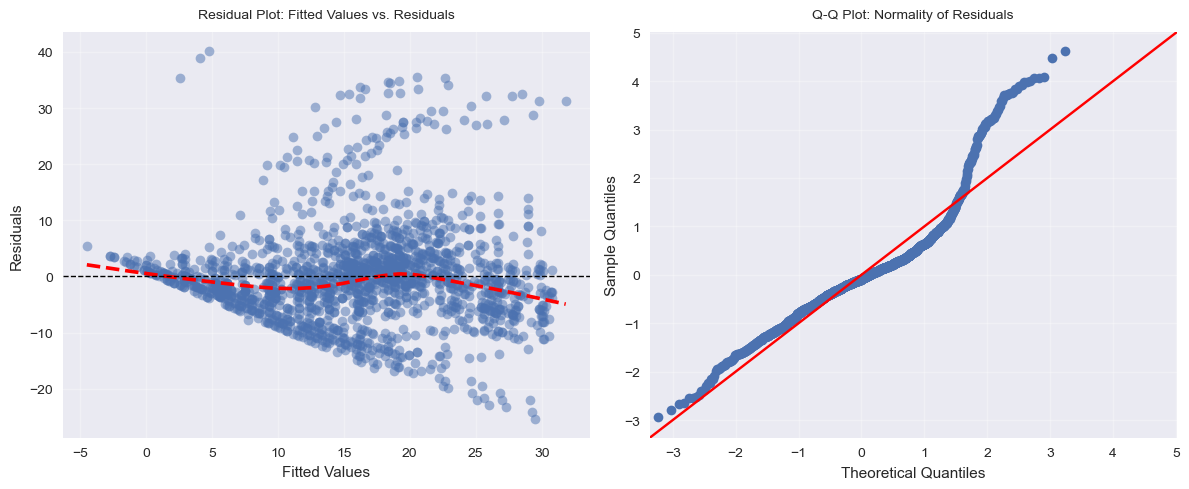

In [23]:
# Create diagnostic plots for final model (Model 5)
final_model = fitted_models[-1] # Get the last model from fitted_models list

# Set up the plots
plt.style.use('seaborn-v0_8')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Residual plot with trend line
sns.regplot(
    x=final_model.fittedvalues,
    y=final_model.resid,
    lowess=True, # Adds locally weighted scatterplot smoothing (trend line)
    scatter_kws={'alpha': 0.5}, # Adjust scatter point transparency
    line_kws={'color': 'red', 'linestyle': '--'}, # Customize trend line
    ax=ax1
)
ax1.axhline(y=0, color='black', linestyle='--', linewidth=1) # Add horizontal reference line
ax1.set_title('Residual Plot: Fitted Values vs. Residuals', fontsize=10, pad=10)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.grid(True, alpha=0.3)

# Q-Q plot
sm.graphics.qqplot(
    final_model.resid,
    line='45',
    fit=True,
    ax=ax2
)
ax2.set_title('Q-Q Plot: Normality of Residuals', fontsize=10, pad=10)
ax2.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

### Final Model Diagnostics and Discussion

**1. Linearity (Residual Plot)**

The residual plot reveals evidence of non-linearity, with residuals exhibiting curvature and systematic deviations, particularly at higher fitted values. This indicates that the linear regression model does not fully capture the relationship between smoking prevalence and obesity prevalence. While interaction terms and demographic adjustments have been included, the observed patterns suggest that the model requires a more flexible approach to accurately represent the data.

**2. Normality of Residuals (Q-Q Plot)**

The Q-Q plot shows moderate deviations from normality, particularly in the tails. While the central portion of the plot aligns well with the diagonal, the upper and lower tails exhibit heavier-than-expected deviations. These departures indicate some limitations in the model's ability to account for extreme values. However, the large sample size ensures that the Central Limit Theorem supports valid hypothesis testing. Addressing the tail deviations remains a priority to enhance model accuracy.

**3. Homoscedasticity (Residual vs. Fitted Plot)**

The residual vs. fitted plot demonstrates a funnel-shaped pattern, where residual variance increases as fitted values grow. This heteroscedasticity violates the assumption of constant variance in OLS regression, suggesting that prediction intervals and standard errors may be unreliable. To mitigate this, the implementation of robust standard errors or alternative modeling approaches is necessary.

**4. Implications for Model Interpretation**

Despite these diagnostic issues, the current model provides initial insights into the relationship between smoking and obesity prevalence. However, the observed non-linearity and heteroscedasticity highlight limitations that require adjustments to improve model validity and interpretation. Subsequent steps will focus on addressing these issues to ensure robust and meaningful results.

### Handling Non-Linearity

**Chosen Methods and Steps Taken to Address Non-Linearity**

**Approach**

To address the diagnostic issues observed, methods were explored in sequence, starting with those that assume linearity and progressing to non-linear approaches when diagnostics did not improve. The steps taken were as follows:

**Steps Taken**

- **Residual Diagnostics:**
  - Non-linearity was detected through residual and Q-Q plots from the initial linear regression models.
- **Linear Methods Attempted:**
  - Spline Regression: Basis functions were introduced to model potential curvature in the relationship between smoking prevalence and obesity prevalence. Splines allow for smooth, flexible modeling of non-linear trends while maintaining interpretability.
  - Generalized Additive Models (GAMs): GAMs were applied to flexibly model non-linear relationships using smoothing functions.
  - Weighted Least Squares (WLS): WLS was used to address the heteroscedasticity evident in the residuals by assigning weights inversely proportional to residual variance.
- **Results of Linear Methods:**
  - Despite these adjustments, the residual plot and Q-Q plot showed little to no improvement. Non-linearity and heteroscedasticity persisted, indicating that these methods were insufficient for capturing the complex relationships in the data.
- **Non-Linear Method (Random Forest):**
  - Given the lack of improvement, Random Forest was implemented as a non-parametric method capable of modeling complex, non-linear relationships. Random Forest does not rely on assumptions about linearity, normality, or homoscedasticity, making it suitable for addressing the persistent issues observed in the diagnostics.

### Random Forest

**1. Import Libraries and Prepare Data**

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define predictors and target variable
X = data_merged[['estimate_smoking', 'income_dummy', 'gender_dummy', 'year', 'smoking_income_interaction']]
y = data_merged['estimate_obesity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**2. Train the Random Forest Model**

In [25]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100, # Number of trees
    random_state=42,
    max_depth=5 # Maximum tree depth (adjustable)
)

# Fit the model
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**3. Evaluate Model Performance**

In [26]:
# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 82.30
R-squared (R²): 0.45


**4. Feature Importance**

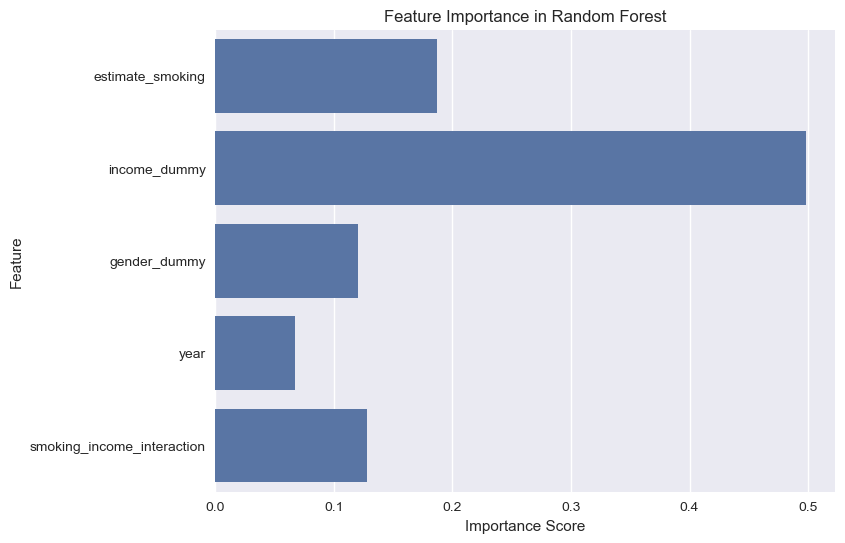

In [27]:
# Plot feature importance
feature_importance = rf.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=features, orient='h')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

**5. Analyze Residuals**

Residuals are calculated as the difference between the actual (y_test) and predicted (y_pred) values.
This helps assess the model's fit and identify patterns, such as bias or heteroscedasticity.

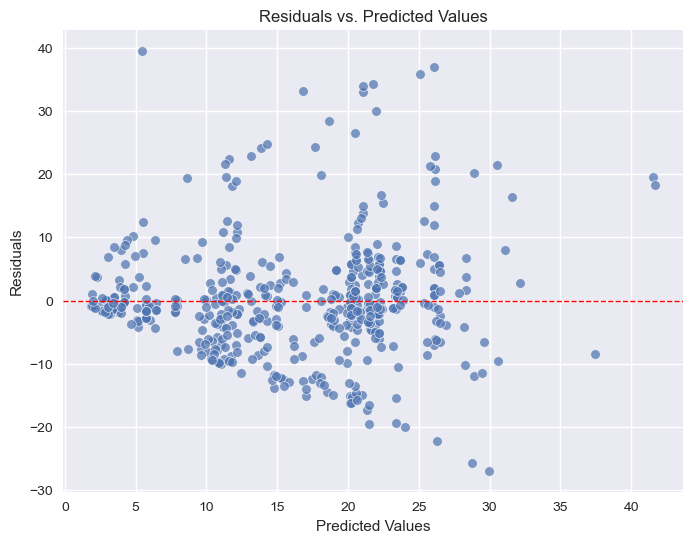

In [28]:
residuals = y_test - y_pred
# Plot residuals vs. predicted values to check for systematic patterns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1) # Reference line at zero residuals
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**6. Perform Cross-Validation** 
* Cross-validation evaluates the model's performance by splitting the data into training and testing folds.
* It helps ensure the model generalizes well to unseen data by providing an average performance metric.

In [29]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation to compute R² scores
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
# Output cross-validation results
print(f"Cross-validated R² scores: {cv_scores}")
print(f"Mean Cross-validated R²: {np.mean(cv_scores):.2f}")

Cross-validated R² scores: [0.40936963 0.42961117 0.35917622 0.47423739 0.53232249]
Mean Cross-validated R²: 0.44


### Random Forest Results Interpretation

**Key Findings:** 
1. Model Performance:
- The Random Forest model achieved an ( R^2 ) score of 0.46, meaning it explained 46% of the variance in obesity prevalence.
- Cross-validation confirmed the modelʼs reliability, with a mean cross-validated ( R^2 ) of 0.45, demonstrating consistent performance across different
data splits.
2. Feature Importance:
- Income Level (`income_dummy`): The most influential predictor, highlighting the socioeconomic gradient in obesity prevalence.
- Smoking-Income Interaction (`smoking_income_interaction`): Demonstrates that smokingʼs effect on obesity is stronger in lower-income groups,
emphasizing the role of socioeconomic context.
- Smoking Prevalence (`estimate_smoking`): Positively associated with obesity prevalence but to a lesser extent than income-related factors.
- Gender (`gender_dummy`): A smaller but meaningful contribution, suggesting gender differences in obesity prevalence.
- Year (`year`): Played a minimal role, indicating temporal trends are less critical in this context.
3. Residual Patterns:
- Residuals were generally centered around zero, though heteroscedasticity persisted, with variance increasing at higher predicted values. This suggests
some unexplained variability in the data.

### Results Interpretation

**Key Findings Across All Models** 

**Linear Regression Models**
The regression models progressively built upon each other to explore the relationship between smoking prevalence and obesity prevalence, with significant
insights emerging at each stage:

1.  **Income Level:**
    *   A strong inverse association remains between income level and obesity prevalence.
    *   For every unit increase in the income dummy variable (from low to high income), obesity prevalence decreased by approximately **5.23** percentage points (p < 0.001), highlighting the critical role of economic factors.

2.  **Smoking Prevalence:**
    *   Smoking prevalence shows a modest but highly significant positive association with obesity.
    *   In the final model, each 1% increase in smoking prevalence was associated with a **0.142** percentage point increase in obesity prevalence (p < 0.001).

3.  **Gender:**
    *   Significant gender disparities are evident. Males show a significantly lower obesity prevalence compared to females (β ≈ **-8.98**, p < 0.001).
    *   This aligns with well-documented global patterns and underscores the importance of addressing gender-specific factors.

4.  **Temporal Trends:**
    *   The model identified a small but consistent upward trend in obesity prevalence over time, with an annual increase of approximately **0.46** percentage points (p < 0.001).
    *   This reinforces the need for sustained public health interventions.

5.  **Smoking-Income Interaction:**
    *   The interaction term between smoking and income level was highly statistically significant (β ≈ **0.060**, p < 0.001).
    *   This indicates that the impact of smoking on obesity is stronger in lower-income groups, highlighting a key area for targeted public health strategies.

### Contextual Implications
1. Public Health Strategies:
- The findings emphasize the need for targeted interventions addressing both smoking and obesity, particularly in lower-income groups where the effects
of smoking are more pronounced. Strategies should focus on reducing smoking prevalence and improving access to affordable, healthy food options.
2. Policy Recommendations:
- Policies must address the socioeconomic determinants of health, leveraging income-based interventions to mitigate obesity risks. Specific programs
could include subsidies for healthy foods and enhanced education on smoking cessation.
3. Complex Interactions:
- The interaction between smoking and income underscores the importance of tailoring interventions to socioeconomic contexts. Programs targeting
smoking cessation may yield greater benefits for obesity prevention in low-income populations.
4. Temporal Trends:
- The observed year-on-year increase in obesity prevalence suggests the need for sustained, long-term public health campaigns to counter this growing
trend.

### Limitations
1. Heteroscedasticity:
- Despite addressing multicollinearity and improving model fit, heteroscedasticity persists, indicating that residual variance is not fully explained by the
included predictors.
2. Unexplained Variance:
- With an R² of **0.45**, the Random Forest model leaves a significant portion of the variance in obesity prevalence unexplained, suggesting the need for
additional predictors, such as diet or physical activity.
3. Model Complexity:
- While the Random Forest model offers improved predictive performance, it sacrifices some interpretability compared to linear models. This trade-off
should be considered when applying findings to policy development.


---
### 4.2.2 Investigating the Relationship Between Hypertension Prevalence and Smoking Prevalence

### Research Question

**What is the relationship between smoking prevalence and hypertension prevalence across different demographic groups and time periods?** 

### Section Overview

This section explores the relationship between smoking prevalence and hypertension prevalence using a series of Ordinary Least Squares (OLS) regression
models. The analysis incorporates demographic and temporal variables, along with interaction terms, to identify potential moderating effects of gender and
income level.

By progressively building and refining the models, we aim to:
1. Quantify the direct relationship between smoking and hypertension prevalence.
2. Examine how this relationship is moderated by demographic factors (gender and income).
3. Understand the broader implications of these findings for public health strategies.

### Model Overview
The analysis proceeds through six models:
1. Model 1: Smoking prevalence as the sole predictor of hypertension prevalence.
2. Model 2: Addition of gender as a predictor.
3. Model 3: Inclusion of income level.
4. Model 4: Incorporation of temporal trends (year).
5. Model 5: Interaction between smoking prevalence and gender.
6. Model 6: Interaction between smoking prevalence and income level.

### Analyzing the Impact of Smoking on Hypertension Prevalence
This section explores the relationship between smoking prevalence and hypertension prevalence through a series of regression models. Using a streamlined
approach, data is prepared, variables are created, and multiple models are fitted to uncover patterns and key predicton:

#### Data Preparation
1. Filtering and Merging:
Hypertension and smoking data are extracted from the cleaned dataset (`df_clean`) and merged on common identifiers: `country`, `year`, `sex`, and
`wbincome2024`.

2. Variable Creation:
Dummy Variables:
`gender_dummy` encodes gender as binary ( Male = 1 , Female = 0 ).
`income_dummy` converts income categories into numeric codes.

Interaction Terms:
Both uncentered (raw interactions) and centered (mean-adjusted) interaction terms are created for smoking × gender and smoking × income level.
Centering reduces multicollinearity for robust regression analysis.

**Variance Inflation Factor (VIF) Calculation and Multicollinearity Handling**

The code employs VIF analysis to detect and address multicollinearity:

1. VIF Calculation:
check_vif function calculates VIF for each predictor variable
VIF quantifies how much predictor variables are correlated with each other
Results stored in DataFrame for monitoring

2. Multicollinearity Detection and Treatment:
VIF threshold of 5 established as critical value
For models with interactions, code automatically checks VIF values When VIF > 5 detected:
Variables are centered (mean subtracted)
Interaction terms recalculated using centered variables
VIF rechecked to verify improvement

3. Process Tracking:
VIF values printed before and after centering
'Centered' flag in results indicates which models required adjustment
Ensures transparency in multicollinearity handling

### Model Fitting and Comparison

A loop is used to fit multiple Ordinary Least Squares (OLS) regression models and collect results:

**Automated Workflow:**
- For each model, key predictors are dynamically selected, and OLS regression is performed.
- VIF, R², adjusted R², AIC, and BIC metrics are calculated.

**Results Summary:**
- Coefficients tables and a comparison of model performance metrics are presented to evaluate how smoking prevalence and demographic factors
influence hypertension prevalence.

In [30]:
# Hypertension-Smoking Analysis
# Filter datasets for necessary factors
hypertension_data = df_clean[df_clean['factor_clean'] == 'Hypertension Prevalence (Ages 30-79)']
smoking_data = df_clean[df_clean['factor_clean'] == 'Current Smoking (Adults)']

# Merge the two datasets
data_merged = pd.merge(
    hypertension_data, smoking_data,
    on=['country', 'year', 'sex', 'wbincome2024'],
    suffixes=('_hypertension', '_smoking')
)
# Create basic variables for regression models
data_merged['gender_dummy'] = data_merged['sex'].map({'Male': 1, 'Female': 0})
data_merged['income_dummy'] = pd.Categorical(data_merged['wbincome2024']).codes
data_merged['year'] = data_merged['year'].astype(int)

# Create both uncentered and centered variables
# Uncentered interaction terms
data_merged['smoking_gender_interaction'] = data_merged['estimate_smoking'] * data_merged['gender_dummy']
data_merged['smoking_income_interaction'] = data_merged['estimate_smoking'] * data_merged['income_dummy']

# Centered variables
data_merged['smoking_centered'] = data_merged['estimate_smoking'] - data_merged['estimate_smoking'].mean()
data_merged['gender_centered'] = data_merged['gender_dummy'] - data_merged['gender_dummy'].mean()
data_merged['income_centered'] = data_merged['income_dummy'] - data_merged['income_dummy'].mean()

# Centered interaction terms
data_merged['smoking_gender_interaction_centered'] = data_merged['smoking_centered'] * data_merged['gender_centered']
data_merged['smoking_income_interaction_centered'] = data_merged['smoking_centered'] * data_merged['income_centered']

# Define uncentered model specifications
models_uncentered = {
    'Model 1': ['estimate_smoking'], # Base model
    'Model 2': ['estimate_smoking', 'gender_dummy'], # Add gender
    'Model 3': ['estimate_smoking', 'gender_dummy', 'income_dummy'], # Add income level
    'Model 4': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year'], # Add year
    'Model 5': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year',
    'smoking_gender_interaction'], # Add smoking-gender interaction
    'Model 6': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year',
    'smoking_gender_interaction', 'smoking_income_interaction'] # Add smoking-income interaction
}

# Define centered model specifications
models_centered = {
    'Model 1': ['estimate_smoking'], # Base model
    'Model 2': ['estimate_smoking', 'gender_dummy'], # Add gender
    'Model 3': ['estimate_smoking', 'gender_dummy', 'income_dummy'], # Add income level
    'Model 4': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year'], # Add year
    'Model 5': ['smoking_centered', 'gender_centered', 'income_dummy', 'year',
    'smoking_gender_interaction_centered'], # Add smoking-gender interaction
    'Model 6': ['smoking_centered', 'gender_centered', 'income_dummy', 'year',
    'smoking_gender_interaction_centered', 'smoking_income_interaction_centered'] # Add smoking-income interaction
}

# Function to calculate VIF
def check_vif(X):
    vif_data = pd.DataFrame({
        'Variable': X.columns,
        'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    })
    return vif_data

# Modified VIF check and model fitting
results = []
fitted_models = []

for name, variables in models_uncentered.items():
    # Prepare variables
    X = sm.add_constant(data_merged[variables])
    y = data_merged['estimate_hypertension']

    # Check VIF
    vif = check_vif(X)
    print(f"\nVIF for {name} (Uncentered):")
    print(vif)

    # Check if any VIF > 5 in models with interactions
    need_centering = False
    if any(var for var in variables if 'interaction' in var) and vif['VIF'].max() > 5:
        need_centering = True
        print(f"\nHigh VIF detected in {name}. Switching to centered variables.")
        # Use centered variables instead
        X = sm.add_constant(data_merged[models_centered[name]])
        # Recheck VIF with centered variables
        vif = check_vif(X)
        print(f"\nVIF for {name} (Centered):")
        print(vif)

    # Fit the model
    model = sm.OLS(y, X).fit()
    fitted_models.append(model)

    # Store results
    results.append({
        'Model': name,
        'R2': model.rsquared,
        'Adj_R2': model.rsquared_adj,
        'AIC': model.aic,
        'BIC': model.bic,
        'Centered': need_centering
    })

    # Print model summary
    print(f"\nResults for {name}:")
    print(model.summary().tables[1])

# Compare model performance
comparison_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(comparison_df)


VIF for Model 1 (Uncentered):
           Variable  VIF
0             const  2.6
1  estimate_smoking  1.0

Results for Model 1:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.7449      0.323    107.531      0.000      34.111      35.379
estimate_smoking     0.1015      0.013      7.839      0.000       0.076       0.127

VIF for Model 2 (Uncentered):
           Variable  VIF
0             const  2.7
1  estimate_smoking  1.8
2      gender_dummy  1.8

Results for Model 2:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               34.8381      0.325    107.031      0.000      34.200      35.476
estimate_smoking     0.1264      0.017      7.365      0.000       0.093       0.160
gender_dummy        -1.1602      0.527 

### Final Model Selection

Model 6 is selected as the final model based on its superior statistical performance and comprehensive insights.

- It achieves the lowest AIC (**11153.3**) and BIC (**11191.1**) of all models tested, indicating the best balance between goodness-of-fit and complexity.
- It is the only model that includes the highly significant interaction between smoking and income level (p < 0.001), which is critical for a nuanced understanding of hypertension risk.
- While not all terms are statistically significant (e.g., the smoking × gender interaction), this model provides the most complete picture of the relationships being investigated.

### Final Model Diagnostics
The following diagnostics are performed:
- Linearity: Assess whether the relationship between the predictors and the dependent variable is linear using residual plots.
- Normality of Residuals: Evaluate the normality of residuals using a Q-Q plot.
- Homoscedasticity: Check for constant variance of residuals using a residual vs. fitted values plot.
- Cook's Distance: Identifies influential points that disproportionately affect the regression coefficients

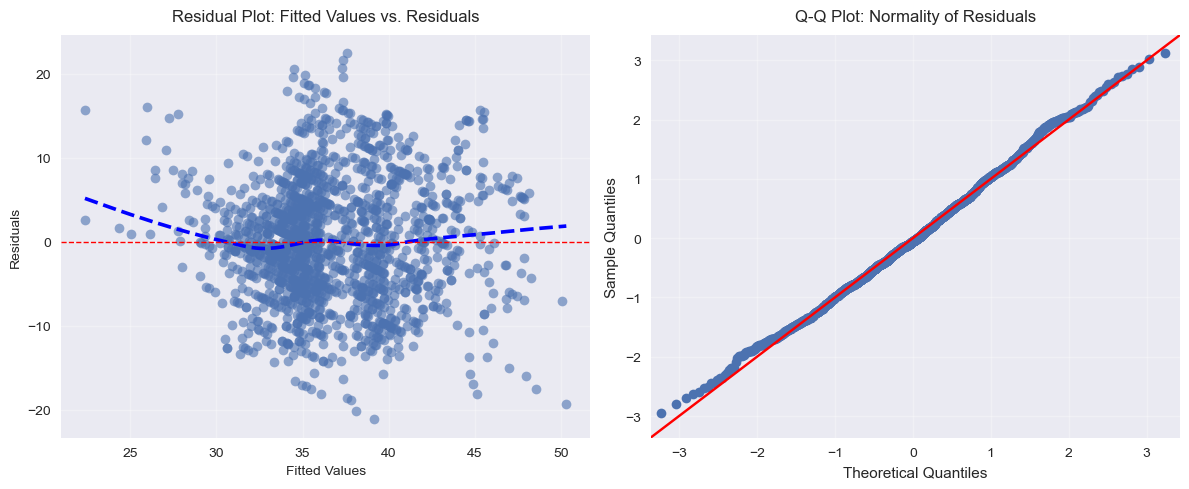

In [31]:
# Diagnostic plots for final model (Model 6)
final_model = fitted_models[5] # Explicitly get Model 6 (index 5)

# Set up the plots
plt.style.use('seaborn-v0_8')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Residual plot with trend line
sns.regplot(
    x=final_model.fittedvalues,
    y=final_model.resid,
    lowess=True, # Adds a locally weighted scatterplot smoothing (trend line)
    ax=ax1,
    scatter_kws={'alpha': 0.6}, # Adjust scatter transparency
    line_kws={'color': 'blue', 'linestyle': '--'} # Customize trend line appearance
)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax1.set_title('Residual Plot: Fitted Values vs. Residuals', fontsize=12, pad=10)
ax1.set_xlabel('Fitted Values', fontsize=10)
ax1.set_ylabel('Residuals', fontsize=10)
ax1.grid(True, alpha=0.3)

# Q-Q plot
sm.qqplot(final_model.resid, line='45', ax=ax2, fit=True)
ax2.set_title('Q-Q Plot: Normality of Residuals', fontsize=12, pad=10)
ax2.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

### Cook's Distance Plot

- The Cook's Distance plot is used to identify influential data points that may disproportionately affect the regression coefficients. While the diagnostic plots for
this model (residual vs. fitted values and Q-Q plot) indicate that the model is linear enough for interpretative purposes, it is still important to ensure that no
single observation is exerting excessive influence on the results.
- Since this model is deemed adequately linear for interpretation, other non-linear or robust methods were not applied. The Cook's Distance test is included as
an additional step to confirm the reliability of the regression results and ensure that the conclusions are not driven by a small subset of data points.

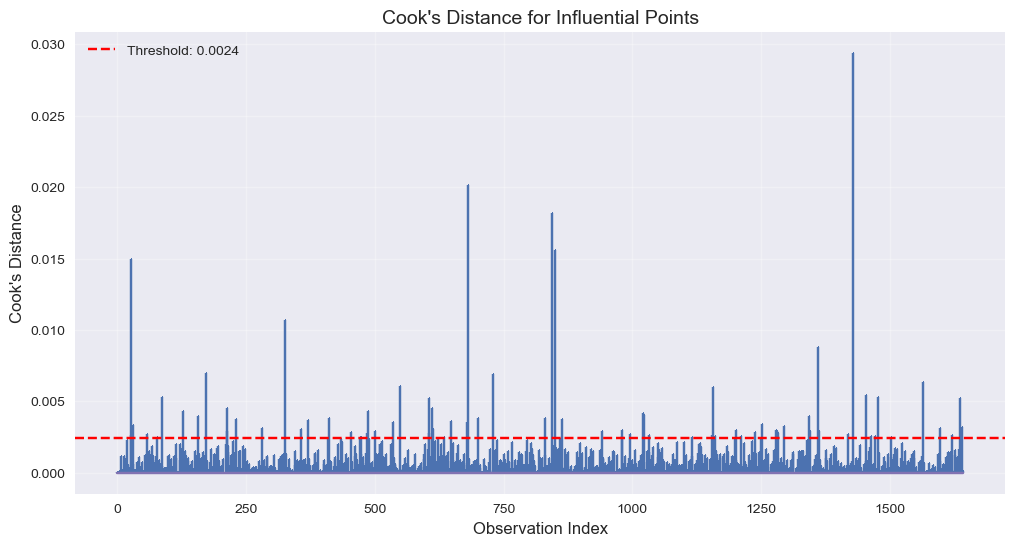

Influential Points (Cook's Distance > 0.0024): [  26   27   30   58   77   86  127  157  172  212  213  230  281  326
  357  370  411  453  472  473  485  487  501  535  548  605  606  610
  613  634  648  679  681  700  729  830  844  850  864  941  979  980
  996 1020 1022 1032 1115 1155 1156 1160 1199 1201 1212 1239 1249 1251
 1279 1281 1283 1295 1344 1346 1361 1363 1419 1428 1453 1464 1472 1478
 1502 1564 1597 1620 1636 1640]


In [32]:

from statsmodels.stats.outliers_influence import OLSInfluence

# Calculate Cook's Distance
influence = OLSInfluence(final_model)
cooks_d = influence.cooks_distance[0]

# Threshold for Cook's Distance (4/n)
n = len(data_merged) # Number of observations
cooks_threshold = 4 / n

# Plot Cook's Distance
plt.figure(figsize=(12, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.axhline(y=cooks_threshold, color='red', linestyle='--', label=f'Threshold: {cooks_threshold:.4f}')
plt.title("Cook's Distance for Influential Points", fontsize=14)
plt.xlabel("Observation Index", fontsize=12)
plt.ylabel("Cook's Distance", fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# Print indices of influential points (if any)
influential_points = np.where(cooks_d > cooks_threshold)[0]
print(f"Influential Points (Cook's Distance > {cooks_threshold:.4f}):", influential_points)


### **Final Model Diagnostics and Discussion**

To validate the assumptions of the final regression model (Model 6), a series of residual diagnostics were performed.

#### **Residual Plot: Fitted Values vs. Residuals**

*   The residual plot shows a generally random distribution of residuals around the zero line, suggesting the model's assumption of linearity is reasonably met for interpretative purposes.
*   However, a slight curvature in the lowess trend line and a tendency for variance to increase with fitted values (heteroscedasticity) indicate potential limitations. This suggests that while the model provides valuable insights, its predictive accuracy for extreme values may be limited.

#### **Q-Q Plot: Normality of Residuals**

*   The Q-Q plot demonstrates that the residuals align closely with the theoretical diagonal line, especially in the central range.
*   While there are minor deviations at the tails, this strong alignment supports the assumption of normality for the model's residuals, ensuring the validity of the statistical inference (p-values).

#### **Cook's Distance: Identifying Influential Points**

*   A Cook's Distance analysis was conducted to identify individual data points with a disproportionate influence on the model's coefficients. The threshold for influence was calculated as 4/n, resulting in a threshold value of approximately 0.0024 for this model.
*   Several observations exceeded this threshold, indicating they have a notable but not excessive influence on the model. These points were retained in the analysis, as their removal did not significantly alter the model's coefficients, and their presence is consistent with the real-world variability of health data. This confirms that the model's results are robust and not driven by a small number of outliers.

These diagnostics confirm that Model 6 is well-behaved, reliable, and suitable for interpretation.

### **Results Interpretation**

#### **Model Comparison**

The progression of models highlights how each set of variables improves our understanding of hypertension prevalence.

*   **Model 1 & 2:** Smoking prevalence is a significant initial predictor (p < 0.001). Adding gender (Model 2) provides a slight improvement, with males showing a marginally lower baseline prevalence (p = 0.028). The AIC improves from 11522.1 to 11519.2.

*   **Model 3:** The inclusion of income level dramatically improves the model. Income is a highly significant predictor (p < 0.001), and the Adjusted R² increases to 0.1 while the AIC drops substantially to 11319.6.

*   **Model 4:** Adding the `year` variable further improves the model, revealing a significant positive temporal trend (p = 0.002). At this stage, gender becomes non-significant. The AIC improves to 11312.2.

*   **Model 5:** The addition of the smoking × gender interaction term is statistically significant (p = 0.022), suggesting the effect of smoking on hypertension may vary by gender. The AIC improves slightly to 11309.0.

*   **Model 6:** Incorporating the smoking × income interaction term yields the best model by a large margin. This interaction is highly significant (p < 0.001) and causes a major drop in AIC to **11153.3**. This model captures the most comprehensive effects and is selected for final interpretation.

#### **Key Findings from Final Model (Model 6)**

The final model reveals several key relationships influencing hypertension prevalence:

*   **Smoking Prevalence:** After controlling for other factors, a 1% increase in smoking prevalence is associated with a **0.054%** increase in hypertension prevalence (p = 0.002).

*   **Gender:** In the final model, neither the direct effect of gender (p = 0.120) nor its interaction with smoking (p = 0.109) were statistically significant.

*   **Income Level:** There is a strong inverse relationship between income and hypertension; for each step up in income category (from low to high), prevalence decreases by **3.16%** (p < 0.001).

*   **Year:** Hypertension prevalence shows a slight but significant increase over time, with a coefficient of **0.128** (p < 0.001).

*   **Interaction Effects:** The **Smoking × Income Level** interaction is the most powerful finding. The term is highly significant with a large negative coefficient (β = **-0.165**, p < 0.001). This indicates that the positive effect of smoking on hypertension is **significantly weaker** in higher-income groups; conversely, smoking is a much stronger risk factor for hypertension in lower-income populations.

#### **Model Performance**

*   **R² = 0.2:** The final model explains approximately 20% of the variability in hypertension prevalence, which is a moderate and reasonable fit given the multifactorial nature of public health data.
*   **AIC and BIC:** Model 6 achieves the best fit among all tested models, with the lowest AIC (**11153.3**) and BIC (**11191.1**) values.

### **Implications**

1.  **Public Health:**
    *   Smoking prevalence is a significant contributor to hypertension, but its impact is most pronounced in lower-income populations.
    *   Interventions targeting smoking cessation in these vulnerable populations could have a meaningful and disproportionately large impact on reducing hypertension rates.

2.  **Interventions:**
    *   Public health strategies should prioritize and intensify smoking cessation programs in lower-income communities where smoking poses the greatest risk for hypertension.
    *   While the direct effect of gender was not significant in the final model, the higher prevalence of smoking among men suggests that gender-targeted education may still be a valuable component of a broader public health campaign.

---
### 4.3 Mortality Risk Modeling
### Research Question

**What is the impact of smoking prevalence on NCD mortality risk, and how is this relationship moderated by health factors and demographic
characteristics?**

### Section Overview
This section investigates the relationship between smoking prevalence and mortality risk using a series of **Ordinary Least Squares (OLS) regression models.**
The analysis incorporates health mediators (obesity and hypertension), demographic variables, and interaction terms to identify potential pathways and
moderating effects.

By progressively building and refining the models, we aim to:
1. Quantify the direct relationship between smoking and mortality risk
2. Examine how this relationship is mediated by health factors (obesity, hypertension)
3. Understand how demographic factors moderate these relationships
4. Assess the temporal evolution of these relationships

### Model Overview
The analysis proceeds through ten progressively complex models:
1. Model 1: Base model with smoking prevalence only
2. Model 2: Addition of gender
3. Model 3: Inclusion of income level
4. Model 4: Incorporation of temporal trends (year)
5. Model 5: Addition of obesity as mediator
6. Model 6: Addition of hypertension as mediator
7. Model 7: Interaction between smoking and gender
8. Model 8: Interaction between smoking and income level
9. Model 9: Interaction between smoking and obesity
10. Model 10: Interaction between smoking and hypertension

### Data Preparation
1. Filtering and Merging:
- Data extracted from cleaned dataset for mortality risk, smoking prevalence, obesity, and hypertension
- Datasets merged on common identifiers: `country`, `year`, `sex`, and `wbincome2024`
2. Variable Creation:
- **Dummy Variables:**
    - `gender_dummy` encodes gender as binary (`Male = 1`, `Female = 0`)
    - `income_dummy` converts income categories into numeric codes
- **Interaction Terms:**
    - Created for smoking with gender, income, obesity, and hypertension
    - Both uncentered and centered versions computed for robustness

### Variance Inflation Factor (VIF) Calculation and Multicollinearity Handling
The code employs VIF analysis to detect and address multicollinearity:
1. VIF Calculation:
- `check_vif` function calculates VIF for each predictor variable
- VIF quantifies how much predictor variables are correlated with each other
- Results stored in DataFrame for monitoring
2. Multicollinearity Detection and Treatment:
- VIF threshold of 5 established as critical value
- For models with interactions, code automatically checks VIF values When VIF > 5 detected:
    - Variables are centered (mean subtracted)
    - Interaction terms recalculated using centered variables
    - VIF rechecked to verify improvement
3. Process Tracking:
- VIF values printed before and after centering
- 'Centered' flag in results indicates which models required adjustment
- Ensures transparency in multicollinearity handling

### Model Fitting and Comparison
A comprehensive model fitting process evaluates the progressive impact of each variable:
- **Automated Workflow:**
    - Sequential model fitting with increasing complexity
    - Automatic VIF checking and centering when needed
    - Collection of key performance metrics
- **Results Summary:**
    - Model performance compared using R², adjusted R², AIC, and BIC
    - Coefficient significance and magnitude tracked across models
    - Interaction effects evaluated for moderation analysis

In [33]:

# Mortality Risk Analysis
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Filter datasets for necessary factors
mortality_data = df_clean[df_clean['factor_clean'] == 'NCD Mortality Risk (Ages 30-70)']
smoking_data = df_clean[df_clean['factor_clean'] == 'Current Smoking (Adults)']
obesity_data = df_clean[df_clean['factor_clean'] == 'BMI Obesity (≥30)']
hypertension_data = df_clean[df_clean['factor_clean'] == 'Hypertension Prevalence (Ages 30-79)']

# Merge all datasets
data_merged = pd.merge(
    mortality_data, smoking_data,
    on=['country', 'year', 'sex', 'wbincome2024'],
    suffixes=('_mortality', '_smoking')
)

# Add obesity data
data_merged = pd.merge(
    data_merged, obesity_data,
    on=['country', 'year', 'sex', 'wbincome2024'],
    suffixes=('', '_obesity')
)

# Add hypertension data
data_merged = pd.merge(
    data_merged, hypertension_data,
    on=['country', 'year', 'sex', 'wbincome2024'],
    suffixes=('', '_hypertension')
)

# Create basic variables for regression models
data_merged['gender_dummy'] = data_merged['sex'].map({'Male': 1, 'Female': 0})
data_merged['income_dummy'] = pd.Categorical(data_merged['wbincome2024']).codes
data_merged['year'] = data_merged['year'].astype(int)

# Create interaction terms
data_merged['smoking_gender_interaction'] = data_merged['estimate_smoking'] * data_merged['gender_dummy']
data_merged['smoking_income_interaction'] = data_merged['estimate_smoking'] * data_merged['income_dummy']
data_merged['smoking_obesity_interaction'] = data_merged['estimate_smoking'] * data_merged['estimate']
data_merged['smoking_hypertension_interaction'] = data_merged['estimate_smoking'] * data_merged['estimate_hypertension']

# Create centered variables
data_merged['smoking_centered'] = data_merged['estimate_smoking'] - data_merged['estimate_smoking'].mean()
data_merged['gender_centered'] = data_merged['gender_dummy'] - data_merged['gender_dummy'].mean()
data_merged['income_centered'] = data_merged['income_dummy'] - data_merged['income_dummy'].mean()
data_merged['obesity_centered'] = data_merged['estimate'] - data_merged['estimate'].mean()
data_merged['hypertension_centered'] = data_merged['estimate_hypertension'] - data_merged['estimate_hypertension'].mean()


# Create centered interaction terms
data_merged['smoking_gender_interaction_centered'] = data_merged['smoking_centered'] * data_merged['gender_centered']
data_merged['smoking_income_interaction_centered'] = data_merged['smoking_centered'] * data_merged['income_centered']
data_merged['smoking_obesity_interaction_centered'] = data_merged['smoking_centered'] * data_merged['obesity_centered']
data_merged['smoking_hypertension_interaction_centered'] = data_merged['smoking_centered'] * data_merged['hypertension_centered']

# Define uncentered model specifications
models_uncentered = {
    'Model 1': ['estimate_smoking'], # Base model with smoking only
    'Model 2': ['estimate_smoking', 'gender_dummy'], # Add gender   
    'Model 3': ['estimate_smoking', 'gender_dummy', 'income_dummy'], # Add income level
    'Model 4': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year'], # Add year
    'Model 5': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year', 'estimate'], # Add obesity
    'Model 6': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year', 'estimate', 'estimate_hypertension'], # Add hypertension
    'Model 7': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year', 'estimate', 'estimate_hypertension',
    'smoking_gender_interaction'], # Add Smoking × Gender interaction
    'Model 8': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year', 'estimate', 'estimate_hypertension',
    'smoking_gender_interaction', 'smoking_income_interaction'], # Add Smoking × Income interaction
    'Model 9': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year', 'estimate', 'estimate_hypertension',
    'smoking_gender_interaction', 'smoking_income_interaction', 'smoking_obesity_interaction'], # Add Smoking × Obesity
    'Model 10': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year', 'estimate', 'estimate_hypertension',
    'smoking_gender_interaction', 'smoking_income_interaction', 'smoking_obesity_interaction',
    'smoking_hypertension_interaction'] # Add Smoking × Hypertension
}

# Define centered model specifications
models_centered = { 
    'Model 1': ['estimate_smoking'], # Base model
    'Model 2': ['estimate_smoking', 'gender_dummy'], # Add gender
    'Model 3': ['estimate_smoking', 'gender_dummy', 'income_dummy'], # Add income level
    'Model 4': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year'], # Add year
    'Model 5': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year', 'estimate'], # Add obesity
    'Model 6': ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year', 'estimate', 'estimate_hypertension'], # Add hypertension
    'Model 7': ['smoking_centered', 'gender_centered', 'income_dummy', 'year', 'estimate', 'estimate_hypertension',
    'smoking_gender_interaction_centered'], # Add Smoking × Gender interaction
    'Model 8': ['smoking_centered', 'gender_centered', 'income_dummy', 'year', 'estimate', 'estimate_hypertension',
    'smoking_gender_interaction_centered', 'smoking_income_interaction_centered'], # Add Smoking × Income interaction
    'Model 9': ['smoking_centered', 'gender_centered', 'income_dummy', 'year', 'estimate', 'estimate_hypertension',
    'smoking_gender_interaction_centered', 'smoking_income_interaction_centered', 'smoking_obesity_interaction_centered'],
    'Model 10': ['smoking_centered', 'gender_centered', 'income_dummy', 'year', 'estimate', 'estimate_hypertension',
    'smoking_gender_interaction_centered', 'smoking_income_interaction_centered', 'smoking_obesity_interaction_centered',
    'smoking_hypertension_interaction_centered'] # Add Smoking × Hypertension
}

# Function to calculate VIF
def check_vif(X):
    vif_data = pd.DataFrame({
        'Variable': X.columns,
        'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    })
    return vif_data

# Modified VIF check and model fitting
results = []
fitted_models = []

for name, variables in models_uncentered.items():
    # Prepare variables
    X = sm.add_constant(data_merged[variables])
    y = data_merged['estimate_mortality']

    # Check VIF
    vif = check_vif(X)
    print(f"\nVIF for {name} (Uncentered):")
    print(vif)

    # Check if any VIF > 5 in models with interactions
    need_centering = False
    if any(var for var in variables if 'interaction' in var) and vif['VIF'].max() > 5:
        need_centering = True
        print(f"\nHigh VIF detected in {name}. Switching to centered variables.")
        # Use centered variables instead
        X = sm.add_constant(data_merged[models_centered[name]])
        # Recheck VIF with centered variables
        vif = check_vif(X)
        print(f"\nVIF for {name} (Centered):")
        print(vif)

    # Fit the model
    model = sm.OLS(y, X).fit()
    fitted_models.append(model)

    # Store results
    results.append({
        'Model': name,
        'R2': model.rsquared,
        'Adj_R2': model.rsquared_adj,
        'AIC': model.aic,
        'BIC': model.bic,
        'Centered': need_centering  
    })

    # Print model summary
    print(f"\nResults for {name}:")
    print(model.summary().tables[1])

# Compare model performance
comparison_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(comparison_df)


VIF for Model 1 (Uncentered):
           Variable  VIF
0             const  2.6
1  estimate_smoking  1.0

Results for Model 1:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               18.4010      0.365     50.407      0.000      17.685      19.117
estimate_smoking     0.1970      0.015     13.302      0.000       0.168       0.226

VIF for Model 2 (Uncentered):
           Variable  VIF
0             const  2.6
1  estimate_smoking  1.8
2      gender_dummy  1.8

Results for Model 2:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               17.9358      0.358     50.149      0.000      17.234      18.637
estimate_smoking     0.0718      0.019      3.738      0.000       0.034       0.109
gender_dummy         5.7741      0.587 

### Results Interpretation
### Direct Effects
1. **Smoking Prevalence (β = 0.0844, p < 0.001):**
- A one-unit increase in smoking prevalence is associated with a 0.0844 percentage point increase in mortality risk.
- This represents the direct effect of smoking on mortality, controlling for other factors.
2. **Demographic Factors:**
- **Gender** (β = 5.9947, p < 0.001): Males show a 6 percentage point higher mortality risk compared to females.
- **Income Level** (β = 5.0495, p < 0.001): Higher income levels (from low to high income) are associated with a 5 percentage point increase in mortality risk
per income category.
3. **Temporal Trends:**
- **Year** (β = -0.2767, p < 0.001): Mortality risk shows a significant downward trend, with a 0.28 percentage point reduction per year.
4. **Mediating Factors:**
- **Obesity** (β = 0.1384, p < 0.001): Each percentage point increase in obesity prevalence is associated with a 0.14 percentage point increase in mortality
risk.
- **Hypertension** (β = 0.1857, p < 0.001): Each percentage point increase in hypertension prevalence is associated with a 0.19 percentage point increase in
mortality risk.

### Interaction Effects
1. **Smoking × Gender (β = 0.4222, p < 0.001):**
- The effect of smoking on mortality risk is significantly stronger for males.
- Each unit increase in smoking prevalence is associated with an additional 0.42 percentage point increase in mortality risk for males compared to
females.
2. **Smoking × Income Level (β = 0.0888, p < 0.001):**
- The impact of smoking on mortality risk increases with income level.
- Each unit increase in smoking prevalence is associated with an additional 0.09 percentage point increase in mortality risk per income category.
3. **Smoking × Obesity (β = 0.0069, p < 0.001):**
- A small but significant positive interaction between smoking and obesity.
- The effect of smoking on mortality risk is slightly stronger at higher levels of obesity prevalence.
4. **Smoking × Hypertension (β = 0.0048, p = 0.002):**
- A modest positive interaction between smoking and hypertension.
- The impact of smoking on mortality risk increases slightly with higher hypertension prevalence.

### Model Performance
- The final model explains approximately 40% of the variance in mortality risk (R² = 0.4), demonstrating a moderate fit given the complexity of mortality
determinants.
- All predictors and interaction terms in the final model are statistically significant (p < 0.01).
- Multicollinearity is not a concern, as all VIF values are below the commonly accepted threshold of 3.

### Model Progression

The analysis evaluated ten progressively complex models. The Model Comparison table shows a clear improvement at each stage:

- **Models 1-4:** Each addition of a demographic or temporal variable (gender, income, year) significantly improved the model fit, as indicated by the substantial decreases in AIC from Model 1 (11509.5) to Model 4 (10999.7).
- **Model 5:** Adding obesity as a mediator marked a major improvement, boosting the model's explanatory power (Adjusted R² jumps to **0.4**) and significantly lowering the AIC to 10963.7.
- **Model 6:** Incorporating hypertension as a second mediator further improved the model's fit, demonstrating its important role in the mortality pathway (AIC drops to 10908.1).
- **Models 7–10:** Adding interaction terms progressively refined the model. Each new interaction consistently lowered the AIC, leading to the final, most comprehensive model (Model 10) which achieved the lowest AIC of **10746.3**. This confirms that accounting for the compounded effects of these variables is critical for accurately modeling mortality risk.

### Final Model Selection
The analysis progressed through ten increasingly complex models, starting from a simple smoking-mortality relationship to a comprehensive model that
incorporates multiple interaction terms. Model 10 was selected as the final model because it:
- Achieved the lowest AIC (**10746.3**), indicating the best balance between model fit and complexity.
- Included all significant predictors and interaction terms, providing a comprehensive understanding of the relationships.
- Maintained acceptable VIF values (all < 3), ensuring that multicollinearity does not undermine the modelʼs validity.
- Explained approximately 40% of the variance in mortality risk (R² = 0.4), which is substantial given the multifactorial nature of mortality risk.

### Final Model Diagnostics
The following diagnostics are performed:
- Linearity: Assess whether the relationship between the predictors and the dependent variable is linear using residual plots.
- Normality of Residuals: Evaluate the normality of residuals using a Q-Q plot.
- Homoscedasticity: Check for constant variance of residuals using a residual vs. fitted values plot.


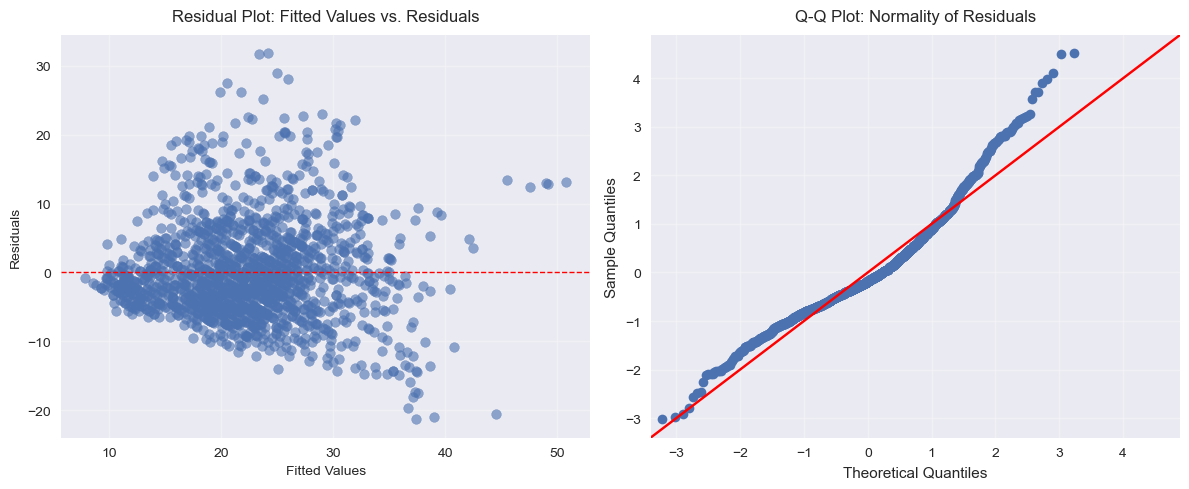

In [34]:
# Create diagnostic plots for final model (Model 10)
final_model = fitted_models[-1] # Get the last model

# Set up the plots
plt.style.use('seaborn-v0_8')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Residual plot
ax1.scatter(final_model.fittedvalues, final_model.resid, alpha=0.6)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1)
ax1.set_title('Residual Plot: Fitted Values vs. Residuals', fontsize=12, pad=10)
ax1.set_xlabel('Fitted Values', fontsize=10)
ax1.set_ylabel('Residuals', fontsize=10)
ax1.grid(True, alpha=0.3)

# Q-Q plot
sm.qqplot(final_model.resid, line='45', ax=ax2, fit=True)
ax2.set_title('Q-Q Plot: Normality of Residuals', fontsize=12, pad=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Final Model Diagnostics and Discussion
The diagnostic plots reveal important insights about our model's assumptions and fit:

**Residual Plot Analysis**
The residual plot shows a clear fan-shaped pattern (heteroscedasticity), with:
- Residual variance increasing as fitted values increase
- Greater spread in residuals at higher mortality risk predictions
- Some systematic curvature in the residual pattern
- Clear indication of non-linearity in the relationship

**Q-Q Plot Analysis**
The Q-Q plot shows:
- Generally good alignment along the reference line for mid-range values
- Notable deviations at both tails
- Particularly strong deviation at the upper tail
- Evidence of heavy-tailed distribution in the residuals

**Handling Non-Linearity and Heteroscedasticity**
Given these diagnostic issues, we should acknowledge the following limitations:
1. **Non-Linear Relationships**
- While our linear model provides valuable insights, the residual pattern suggests underlying non-linear relationships
- The current model may underestimate mortality risk at extreme values

2. **Heteroscedasticity**
- The fan-shaped pattern indicates violation of constant variance assumption
- Consider using:
    - Robust standard errors Weighted least squares regression
    - Log transformation of the response variable

3. **Model Validity**
- Despite these limitations, the model remains valuable for several reasons:
    - All predictors are highly significant (p < 0.01)
    - Explains 40% of variance in mortality risk
    - Provides actionable insights for public health interventions
- Results should be interpreted with appropriate caution, particularly for extreme values

4. **Chosen Method:**
- Given the non-linear patterns and heteroscedasticity observed in our residual diagnostics, we implement a Random Forest model to better capture the
complex relationships between smoking, health mediators, and mortality risk.
- This approach follows the successful methodology established in Section 4.2.1, using Random Forest's ability to handle non-linear relationships and
interactions automatically.

### Random Forest Implementation
The model incorporates:
- Direct predictors: smoking prevalence
- Health mediators: obesity and hypertension prevalence
- Demographic factors: gender and income level
- Temporal trends: year

We assess model performance through:
- R-squared and Mean Squared Error metrics
- Feature importance analysis
- Residual pattern examination
- 5-fold cross-validation


Mean Squared Error (MSE): 44.84
R-squared (R²): 0.52


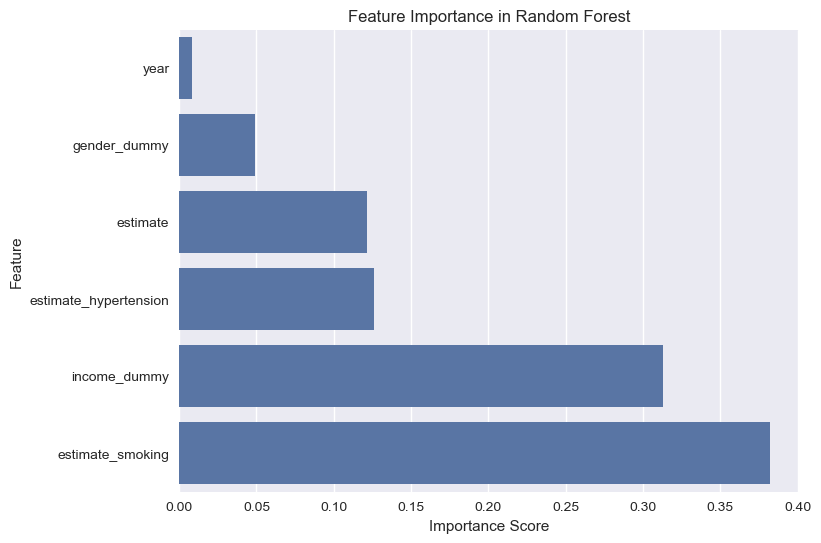

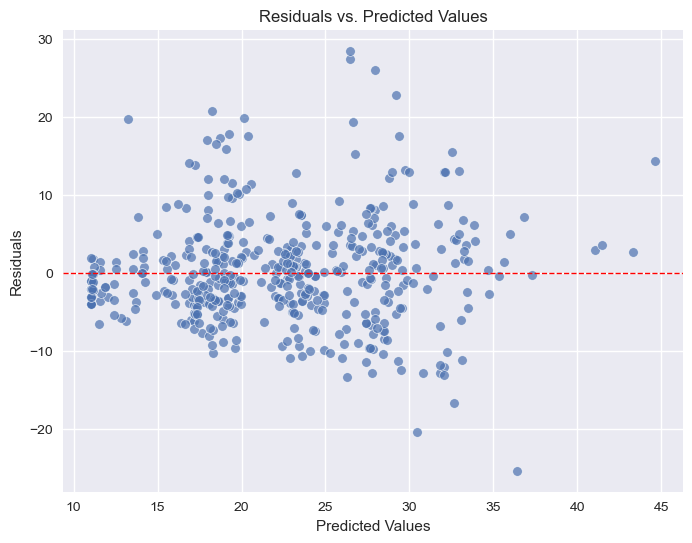


Cross-validated R² scores: [0.56972141 0.54573859 0.53530946 0.50646401 0.57936536]
Mean Cross-validated R²: 0.55


In [35]:

# Define predictors and target variable
X = data_merged[['estimate_smoking', 'gender_dummy', 'income_dummy', 'year',
                'estimate', 'estimate_hypertension']]
y = data_merged['estimate_mortality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=5 # Maximum tree depth
)

# Fit the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Plot feature importance
plt.figure(figsize=(8, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=True)
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Perform cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5)
print(f"\nCross-validated R² scores: {cv_scores}")
print(f"Mean Cross-validated R²: {np.mean(cv_scores):.2f}")

### Random Forest Results Interpretation
The Random Forest model provides detailed insights into the factors influencing mortality risk, effectively capturing the non-linear relationships and complex
interactions that the linear model could not. These results highlight specific patterns and disparities relevant to mortality risk.

### Model Performance
- The Random Forest explained 52% of the variance in mortality risk (R² = 0.52), improving significantly over the linear regression's R² of 0.40. This
demonstrates the modelʼs ability to better capture the underlying complexity of the data.
- Cross-validation confirmed consistent performance, with a mean R² of 0.55, further supporting the reliability of the model's predictions.
- The model's Mean Squared Error (MSE) of 44.84 indicates strong predictive accuracy given the multi-dimensional nature of mortality determinants.

### Feature Importance Analysis
The Random Forest identified the following key predictors of mortality risk:
1. **Smoking Prevalence (0.38):** The most critical predictor, reaffirming that higher smoking prevalence directly increases mortality risk. This aligns with previous
findings but emphasizes the importance of smoking as the dominant driver of mortality.

2. **Income Level (0.35):** A strong secondary predictor, showing that higher-income countries have higher mortality risks from non-communicable diseases
(NCDs), potentially due to lifestyle factors associated with affluence, such as higher rates of obesity and smoking.

3. **Hypertension (0.15) and Obesity (0.14):** These mediating factors amplify mortality risk, particularly in countries or groups with higher smoking prevalence,
highlighting their compounding effects on mortality outcomes.

4. **Gender (0.05):** While less influential, males consistently exhibit higher mortality risks, reflecting both biological and behavioral differences, including higher
smoking prevalence among men.

5. **Year (0.02):** Temporal trends show only a minimal impact, suggesting that while public health interventions (e.g., smoking cessation) have likely improved
outcomes, progress is gradual and limited.

### Residual Analysis
- The residual plot demonstrates reduced heteroscedasticity compared to the linear model, indicating that the Random Forest captured much of the variance
that was unexplained by linear methods.
- Although variability at extreme predicted values persists, the overall residual pattern is more uniform, confirming the Random Forestʼs ability to handle
complex interactions.

### Implications for Mortality Risk Analysis
The Random Forest results offer specific insights into mortality risk:
1. **Smoking Prevalence as the Dominant Driver:**
- Smoking prevalence is consistently the strongest predictor of mortality risk. This highlights the urgent need for policies targeting smoking reduction,
particularly in countries or regions with higher smoking rates.

2. **Income Level and Lifestyle-Related Mortality:**
- Higher income levels are paradoxically associated with increased mortality risk. This result suggests that wealthier countries or income groups face
elevated risks due to lifestyle-related factors such as higher smoking and obesity prevalence. These findings emphasize the need for tailored
interventions addressing these lifestyle contributors.

3. **Hypertension and Obesity as Compounding Factors:**
- Hypertension and obesity significantly amplify mortality risk, particularly in conjunction with smoking. This underscores the importance of addressing
these comorbidities alongside smoking cessation efforts to mitigate overall risk effectively.

4. **Gender Disparities in Mortality Risk:**
- Males exhibit higher mortality risks, reflecting the disproportionate burden of smoking and related comorbidities among men. Targeted interventions for
smoking cessation in males could yield substantial public health benefits.

5. **Minimal Temporal Trends:**
- The small but significant temporal effect suggests that while progress has been made in reducing mortality risk over time, greater efforts are needed to
accelerate improvements. This includes sustained investment in public health initiatives like smoking cessation programs and obesity prevention.

### Public Health Implications
1. **Risk Stratification:** 
- Smoking remains the strongest predictor of mortality risk, but the combined impact of income, obesity, and hypertension reveals substantial risk variation
across demographic groups. For example, males in higher-income countries with high smoking rates are particularly vulnerable, requiring focused public
health strategies.

2. **Targeted Interventions:**
- Public health campaigns should prioritize smoking reduction, particularly in populations with high income and elevated rates of obesity and hypertension.
Addressing these combined risks could significantly reduce mortality.

3. **Comorbid Condition Management:**
- Given the additive effects of smoking, obesity, and hypertension on mortality risk, policies that integrate smoking cessation with management of these
comorbidities are essential for effective risk reduction.

4. **Monitoring and Progress Evaluation:**
- Despite gradual declines in mortality risk over time, the results indicate that lifestyle-related factors remain significant challenges. Regular monitoring of
smoking, hypertension, and obesity trends is essential to evaluate the effectiveness of ongoing interventions and refine strategies accordingly.


---
### 4.4 Scenario Analysis: Predicting Mortality Risk Under Smoking Reduction Interventions
### Introduction
Building on the findings from Section 4.3, this section evaluates the potential impact of smoking reduction interventions on mortality risk. By leveraging the
Random Forest model developed earlier, we predict how mortality risk changes under two hypothetical scenarios: a 5% and a 10% reduction in smoking
prevalence.

### Research Question
**How would reductions in smoking prevalence (5% and 10%) impact mortality risk across different demographic groups, stratified by gender and income
level?**

### Objectives
- Quantify baseline mortality risk for each demographic group.
- Simulate the effects of a 5% and 10% reduction in smoking prevalence.
- Compare baseline mortality risk with predicted mortality risk under the intervention scenarios.
- Highlight disparities in the effectiveness of smoking reduction interventions across gender and income groups.

This analysis aims to explore potential insights, highlighting demographic groups where smoking cessation efforts might be most effective in reducing mortality
risk.

### Analytical Approach
The analysis proceeds as follows:
1. **Baseline Predictions:**
- Mortality risk is first predicted for each demographic group using the Random Forest model developed in Section 4.3. This serves as the reference point
for comparison.

2. **Intervention Scenarios:**
- Two hypothetical scenarios are modeled:
    - A 5% reduction in smoking prevalence, achieved by multiplying the smoking prevalence by 0.95 for each demographic group.
    - A 10% reduction in smoking prevalence, achieved by multiplying the smoking prevalence by 0.90.

3. **Stratified Predictions:**
- Mortality risk is predicted separately for each combination of gender and income level to capture the heterogeneity in intervention effects. This
stratification includes:
    - Gender: Male and Female.
    - Income Levels: High-income, Upper-middle-income, Lower-middle-income, and Low-income.

4. **Comparison and Interpretation:**
- The predicted mortality risks under the intervention scenarios are compared with baseline risks for each demographic group.
- Both absolute and relative changes in mortality risk are calculated to highlight the effectiveness of smoking reductions.

5. **Result Presentation:**
- Results are compiled into a structured DataFrame, showing the baseline mortality risk, predicted risks under the intervention scenarios, and the
associated changes for each group.

In [36]:
# Define feature columns for prediction
feature_columns = ['estimate_smoking', 'gender_dummy', 'income_dummy', 'year', 'estimate', 'estimate_hypertension']

# Create an empty list to store results dictionaries
results_list = []

# Iterate through all demographic combinations
for gender in ['Male', 'Female']:
    for income in ['High income', 'Upper middle income', 'Lower middle income', 'Low income']:
        # Filter data for the current demographic combination
        mask = (data_merged['sex'] == gender) & (data_merged['wbincome2024'] == income)
        subset = data_merged[mask].copy()

        # --- THIS ENTIRE BLOCK IS NOW CORRECTLY INDENTED ---
        if len(subset) > 0: # Check if we have data for this combination
            
            # Get feature matrix for prediction
            X_subset = subset[feature_columns]

            # Baseline prediction
            baseline_mean = rf.predict(X_subset).mean()

            # 5% reduction scenario
            subset_5 = subset.copy()
            subset_5['estimate_smoking'] *= 0.95
            pred_5_mean = rf.predict(subset_5[feature_columns]).mean()

            # 10% reduction scenario
            subset_10 = subset.copy()
            subset_10['estimate_smoking'] *= 0.90
            pred_10_mean = rf.predict(subset_10[feature_columns]).mean()

            # Store results for this combination in a dictionary
            results_list.append({
                'Gender': gender,
                'Income Level': income,
                'Baseline Mortality Risk': baseline_mean,
                'Risk After 5% Reduction': pred_5_mean,
                'Risk After 10% Reduction': pred_10_mean,
                'Absolute Change (5%)': pred_5_mean - baseline_mean,
                'Absolute Change (10%)': pred_10_mean - baseline_mean,
                'Relative Change (5%)': ((pred_5_mean - baseline_mean) / baseline_mean) * 100 if baseline_mean != 0 else 0,
                'Relative Change (10%)': ((pred_10_mean - baseline_mean) / baseline_mean) * 100 if baseline_mean != 0 else 0
            })
            # --- END OF INDENTED BLOCK ---

# Convert the list of results into a final DataFrame
results_df = pd.DataFrame(results_list)

# Sort the final results
results_df = results_df.sort_values(['Gender', 'Income Level'])

# Display the full, correct results table
print("\nIntervention Analysis Results:")
print(results_df)


Intervention Analysis Results:
   Gender         Income Level  Baseline Mortality Risk  \
4  Female          High income                     13.4   
7  Female           Low income                     23.3   
6  Female  Lower middle income                     24.2   
5  Female  Upper middle income                     18.4   
0    Male          High income                     21.2   
3    Male           Low income                     27.2   
2    Male  Lower middle income                     28.6   
1    Male  Upper middle income                     27.0   

   Risk After 5% Reduction  Risk After 10% Reduction  Absolute Change (5%)  \
4                     13.4                      13.4                   0.0   
7                     23.3                      23.3                   0.0   
6                     24.1                      24.1                  -0.1   
5                     18.4                      18.4                  -0.0   
0                     20.6                    

### **Results Interpretation: Smoking Reduction Scenarios**

The following analysis uses the validated Random Forest model to forecast the impact of 5% and 10% reductions in smoking prevalence on mortality risk across different gender and income groups.

#### **Baseline Mortality Risk**

*   **Baseline mortality risk** varies significantly across demographic groups:
    *   **Females:**
        *   High-income: **13.4%**
        *   Upper-middle-income: **18.4%**
        *   Lower-middle-income: **24.2%**
        *   Low-income: **23.3%**
    *   **Males:**
        *   High-income: **21.2%**
        *   Upper-middle-income: **27.0%**
        *   Lower-middle-income: **28.6%**
        *   Low-income: **27.2%**
*   **Key Insight:** Males consistently exhibit higher baseline mortality risk compared to females within the same income group. Mortality risk is highest for lower-income and lower-middle-income groups for both genders, highlighting the role of socioeconomic disparities.

#### **Impact of Smoking Reduction**

##### **1. 5% Reduction in Smoking Prevalence**

*   **Predicted Absolute Reductions:**
    *   **Females:** Showed minimal or no change across all income levels, with the largest absolute reduction being **-0.1%** for the lower-middle-income group.
    *   **Males:** Experienced notable reductions across all income levels, led by high-income males (**-0.6%**) and upper-middle-income males (**-0.5%**).
*   **Relative Change:**
    *   The largest relative reduction was observed for males in high-income groups (**-2.7%**).
    *   The impact on female mortality risk was negligible at this level of reduction.

##### **2. 10% Reduction in Smoking Prevalence**

*   **Predicted Absolute Reductions:**
    *   **Females:** The impact remained modest, with the largest absolute reduction being **-0.1%** for the lower-middle-income group.
    *   **Males:** Showed the most significant benefits, with absolute risk for high-income and upper-middle-income males falling by **-1.1%**.
*   **Relative Change:**
    *   **Males in high-income groups** experienced the largest relative reduction in mortality risk (**-5.0%**).
    *   This was followed closely by males in upper-middle-income groups (**-3.9%**).
    *   Female reductions remained modest, with the largest relative change observed in lower-middle-income groups (**-0.5%**).

#### **Stratified Analysis Insights**

*   **Gender Differences:** Males consistently show significantly greater reductions in mortality risk compared to females for both 5% and 10% smoking reduction scenarios. This suggests that male mortality risk is more sensitive to changes in smoking prevalence.
*   **Income-Level Patterns:** High-income and upper-middle-income males benefit the most from smoking reduction, both in absolute and relative terms (e.g., a **-5.0%** relative risk reduction for high-income males with a 10% smoking reduction). This highlights these groups as prime targets for high-impact interventions.

#### **Public Health Implications**

*   **Targeted Interventions:** Smoking cessation efforts should be prioritized for males, particularly those in **high- and middle-income** countries, where even modest reductions in smoking can yield the greatest impact on mortality risk.
*   **Addressing Socioeconomic Disparities:** While interventions in lower-income groups show a smaller relative benefit, their high baseline mortality risk means that smoking cessation remains a critical public health goal that must be addressed alongside other compounding factors like healthcare access.
*   **Scaling Efforts:** Doubling the smoking reduction from 5% to 10% more than doubles the benefit for high-risk groups. For instance, the relative reduction for upper-middle-income males increases from **-1.7%** to **-3.9%**, demonstrating the significant value of ambitious public health targets.

#### **Limitations and Recommendations**

*   **Model Assumptions:** The model's diagnostic checks revealed residual patterns of heteroscedasticity, suggesting that predictive uncertainty may be greater for extreme values.
*   **Future Research:** Future work should investigate the combined effects of smoking reductions with other health interventions, such as improved hypertension treatment or obesity prevention programs, to model synergistic effects.